This notebook contains the EDA, data processing, and model building ideas for project **CO2 Emissions by Cars** which can be accessed at : [GitHub](https://github.com/d0r1h/CO2-Emission-by-Cars)

[Dataset](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Duplicate Data](#duplicate)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Analyze Categorical Variables](#analyze_cat_var)
        - 4.2.4 - [Anaylze Target Variable](#analyze_tar_var)
        - 4.2.5 - [Analyze Relationship Between Target and Independent Variables](#analyze_tar_ind_var)
        - 4.2.6 - [Feature Engineering](#feature_eng)
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Outliers](#out)
        - 5.1.1 - [Discovery of Outliers](#dis_out)
        - 5.1.2 - [Removal of Outliers](#rem_out)
        - 5.1.3 - [Rechecking of Correlation](#rec_cor)
    - 5.2 - [Categorical Encoding](#cat_enc)
6. **[Building Multiple Linear Regression Models](#bui_mlr_mod)**
    - 6.1 - [Multiple Linear Regression - Basic Model](#bas_mod)
    - 6.2 - [Feature Transformation](#fea_tra)
    - 6.3 - [Feature Scaling](#fea_sca)
    - 6.4 - [Multiple Linear Regression - Full Model - After Feature Scaling](#mod_aft_sca)
    - 6.5 - [Assumptions Before Multiple Linear Regression Model](#ass_bef)
        - 6.5.1 - [Assumption #1: If Target Variable is Numeric](#tgt_num)
        - 6.5.2 - [Assumption #2: Presence of Multi-Collinearity](#pre_mul_col)
    - 6.6 - [Multiple Linear Regression - Full Model - After PCA](#mod_pca)
    - 6.7 - [Feature Selection](#fea_sel)
        - 6.7.1 - [Forward Selection](#for_sel)
        - 6.7.2 - [Backward Elimination](#bac_eli)
    - 6.8 - [Multiple Linear Regression - Full Model - After Feature Selection](#mod_fea_sel)
    - 6.9 - [Assumptions After Multiple Linear Regression Model](#ass_aft)
        - 6.9.1 - [Assumption #1: Linear Relationship Between Dependent and Independent Variable](#lr_dep_ind)
        - 6.9.2 - [Assumption #2: Checking for Autocorrelation](#che_aut_cor)
        - 6.9.3 - [Assumption #3: Checking for Heterskedacity](#che_het)
        - 6.9.4 - [Assumption #4: Test for Normality](#tes_nor)
            - 6.9.4.1 - [Q-Q Plot](#qq_plt)
            - 6.9.4.2 - [Shapiro Wilk Test](#sha_wil_tes)
7. **[Model Evaluation](#mod_eva)**
    - 7.1 - [Measures of Variation](#mea_var)
    - 7.2 - [Inferences about Intercept and Slope](#inf_int_slo)
    - 7.3 - [Confidence Interval for Intercept and Slope](#con_int_slo)
    - 7.4 - [Compare Regression Results](#com_reg_res)
8. **[Model Performance](#mod_per)**
    - 8.1 - [Mean Square Error(MSE)](#mse)
    - 8.2 - [Root Mean Squared Error(RMSE)](#rmse)
    - 8.3 - [Mean Absolute Error(MAE)](#mae)
    - 8.4 - [Mean Absolute Percentage Error(MAPE)](#mape)
    - 8.5 - [Resultant Table](#res_tab)
9. **[Model Optimization](#mod_opt)**
    - 9.1 - [Bias](#bias)
    - 9.2 - [Variance](#var)
    - 9.3 - [Model Validation](#mod_val)
      - 9.3.1 - [Cross Validation](#cro_val)
      - 9.3.2 - [Leave One Out Cross Validation(LOOCV)](#loocv)
    - 9.4 - [Gradient Descent](#gra_des)
    - 9.5 - [Regularization](#reg)
      - 9.5.1 - [Ridge Regression Model](#ridge)
      - 9.5.2 - [Lasso Regression Model](#lasso)
      - 9.5.3 - [Elastic Net Regression Model](#ela_net)
      - 9.5.4 - [Grid Search CV](#gri_sea)
10. **[Displaying Score Summary](#dis_sco_sum)**
11. **[Conclusion](#conclu)**

## New Code - Novelty/Creativity

12. LSTM/BiLSTM
13. Fuel Consumption Efficiency Visualization
14. Baseline Deep Neural Network for CO₂ Emissions Prediction


#### **Data Description**


**Model**

1. 4WD/4X4 = Four-wheel drive
2. AWD = All-wheel drive
3. FFV = Flexible-fuel vehicle
4. SWB = Short wheelbase
5. LWB = Long wheelbase
6. EWB = Extended wheelbase

**Transmission**

1. A = Automatic
2. AM = Automated manual
3. AS = Automatic with select shift
4. AV = Continuously variable
5. M = Manual
6. 3 - 10 = Number of gears

**Fuel type**

1. X = Regular gasoline
2. Z = Premium gasoline
3. D = Diesel
4. E = Ethanol (E85)
5. N = Natural gas

**Fuel Consumption**

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg).

**CO2 Emissions**

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

# 1. Import Libraries <a id='import_lib'></a>

In [ ]:
!pip install mlxtend -qq

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor, LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV, cross_val_score, train_test_split

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

# 2. Set Options <a id='set_options'></a>

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [ ]:
data = pd.read_csv("CO2 Emissions_Canada.csv")

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196
1,ACURA,ILX,COMPACT,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

**Renaming Columns**

In [ ]:
data = data.rename(columns={
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emissions'
})

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [ ]:
data.shape

(7385, 12)

In this dataset we have 7384 records across 12 features

### 4.1.2 Data Types <a id='Data_Types'></a>

In [ ]:
data.dtypes

,0
Make,object
Model,object
Vehicle_Class,object
Engine_Size,float64
Cylinders,int64
Transmission,object
Fuel_Type,object
Fuel_Consumption_City,float64
Fuel_Consumption_Hwy,float64
Fuel_Consumption_Comb,float64


The dataset contains **5 object columns, 3 int column and 4 float columns**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [ ]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [ ]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Make,0,0.000000
Model,0,0.000000
Vehicle_Class,0,0.000000
Engine_Size,0,0.000000
Cylinders,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Fuel_Consumption_City,0,0.000000
Fuel_Consumption_Hwy,0,0.000000
Fuel_Consumption_Comb,0,0.000000


There are **no missing values** present in this dataset

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [ ]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(inplace=True, drop=True)

Now, the dataset has **6281 records and 12 features with no missing and duplicate values**

## 4.2  Data Understanding <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

In [ ]:
data.describe(include=np.number)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


1. The average amount of CO2 emitted from cars is 251 g/km
2. Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway
3. About 75% of the cars have 6 or less cylinders
4. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [ ]:
data.describe(include = object)

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,6282,6282,6282,6282,6282
unique,42,2053,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1139,3039


1. There are a total of 42 different car companies with 2053 different car models
2. Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3. 4 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4. Most of the cars have AS6 transmission

### 4.2.2 Correlation <a id='correlation'></a>

In [ ]:
data_num_features = data.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb1', 'CO2_Emissions'],
      dtype='object')


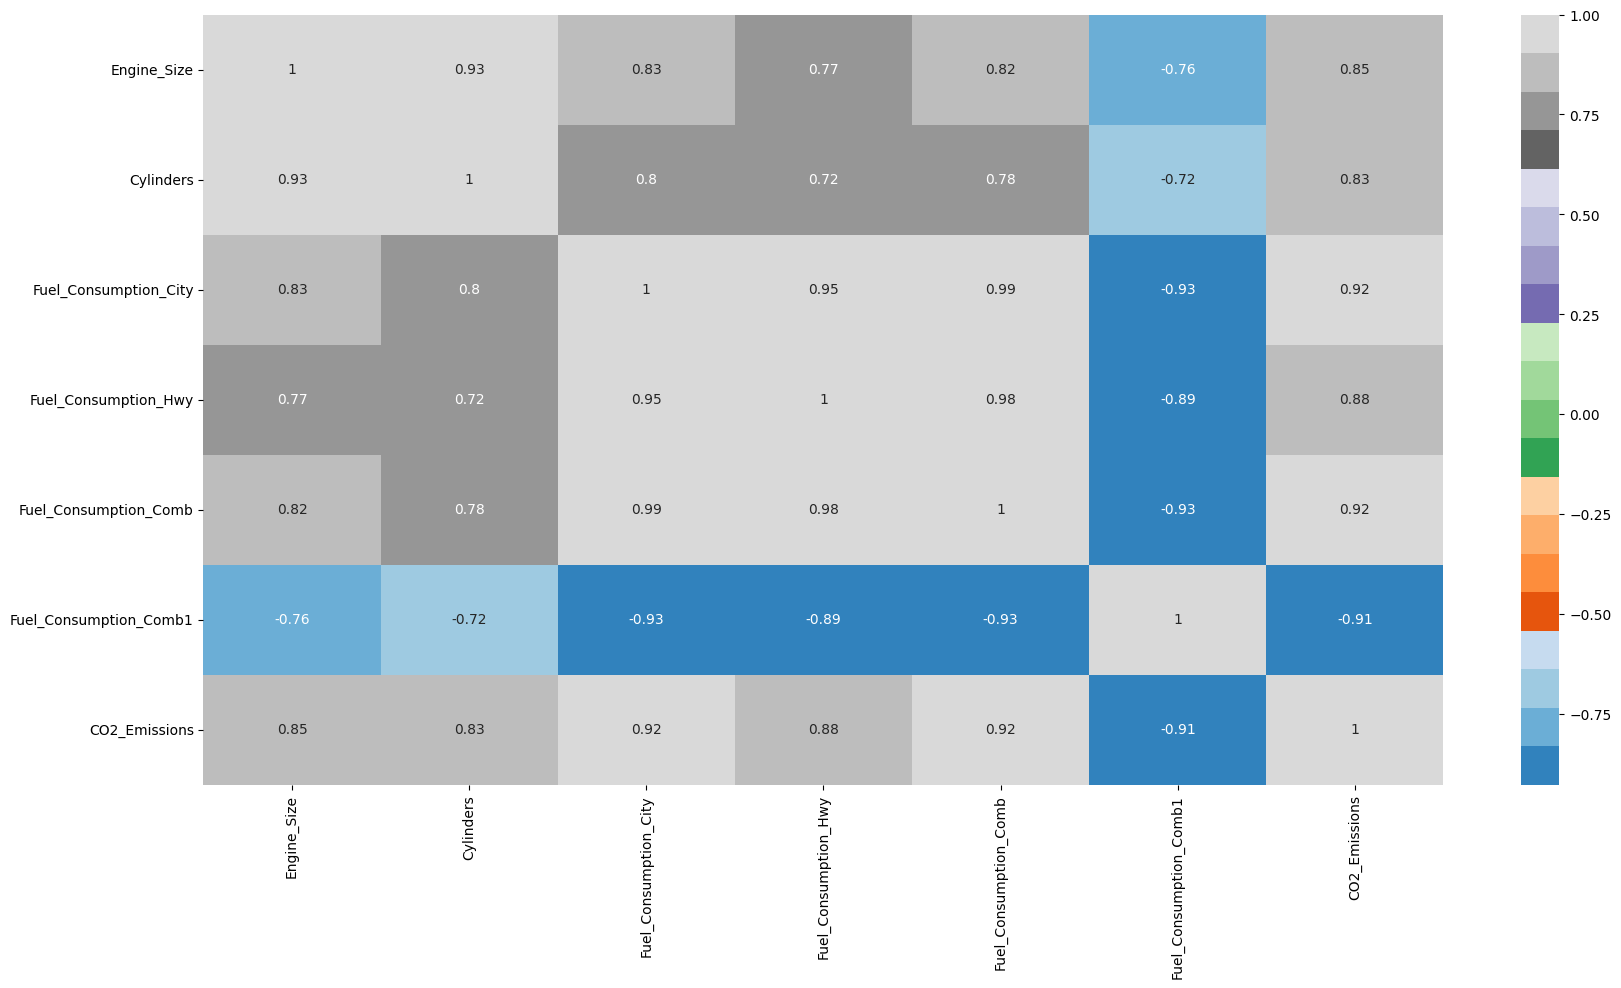

In [ ]:
plt.figure(figsize=(20,10))

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

1. Fuel_Consumption_Comb1 has a high negative correaltion(<-0.9) with CO2_Emissions, Fuel_Consumption_Comb and Fuel_Consumption_City
2. CO2_Emissions has high positive correlation(>0.9) with Fuel_Consumption_Comb and Fuel_Consumption_City

### 4.2.3 Analyse Categorical Variables <a id='analyze_cat_var'></a>

In [ ]:
data_cat_features = data.select_dtypes(include='object')
data_cat_features1 = data_cat_features[['Vehicle_Class', 'Transmission', 'Fuel_Type', 'Model','Make']]

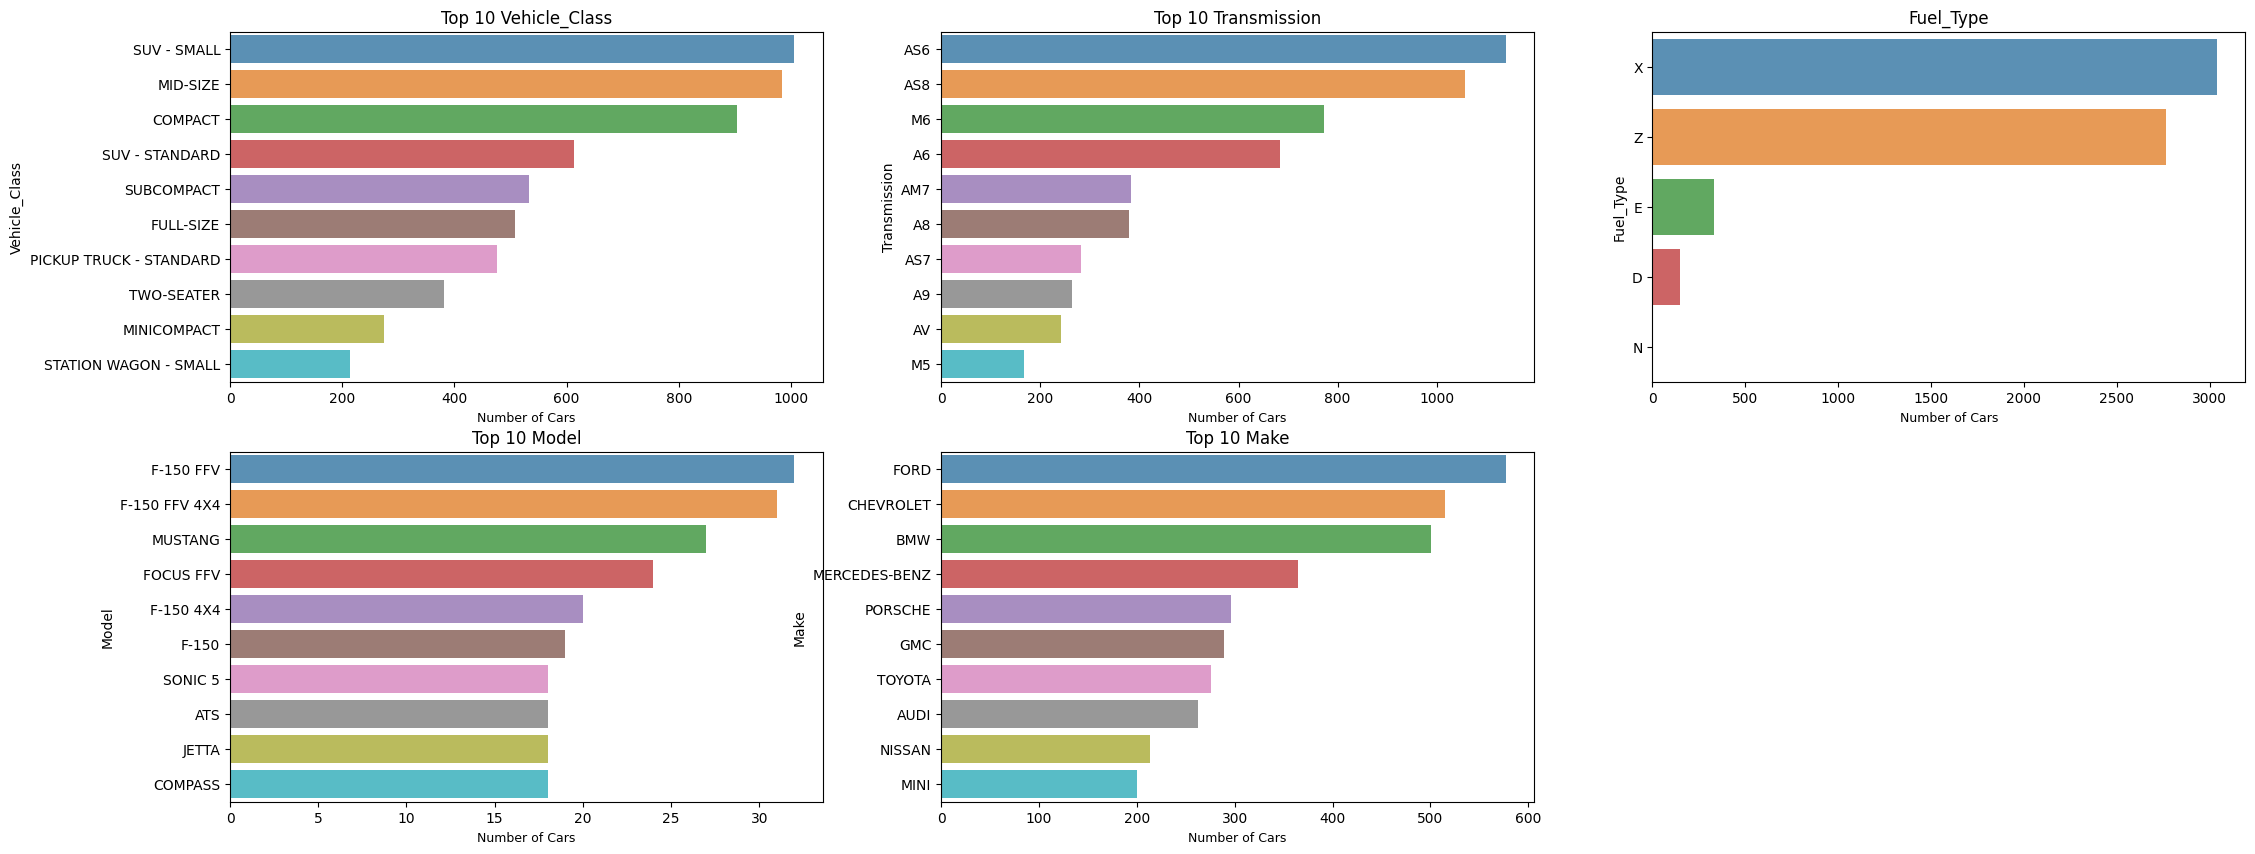

In [ ]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10))

for variable, subplot in zip(data_cat_features1.columns,ax.flatten()):
    cat_count  = data[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(x=cat_count10.values, y=cat_count10.index, alpha=0.8, ax=subplot, palette='tab10')
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)

fig.delaxes(ax[1][2])

1. Top 10 Make: Most of the cars on Canadian roads are made by Ford
2. Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada
3. Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians
4. Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types
5. Fuel Type: Majority of the cars in Canada use Fuel type X and Z

### 4.2.4 Analyse Target Variable <a id='analyze_tar_var'></a>

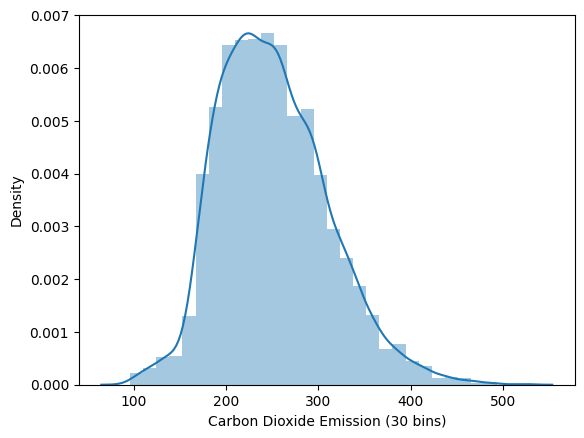

In [ ]:
sns.distplot(data['CO2_Emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

From the above histogram, we can see that CO2_Emissions is moderately positive skewed

In [ ]:
mean = data['CO2_Emissions'].mean()
mode = data['CO2_Emissions'].mode()
median = data['CO2_Emissions'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.1577523081821
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    246
Name: CO2_Emissions, dtype: int64


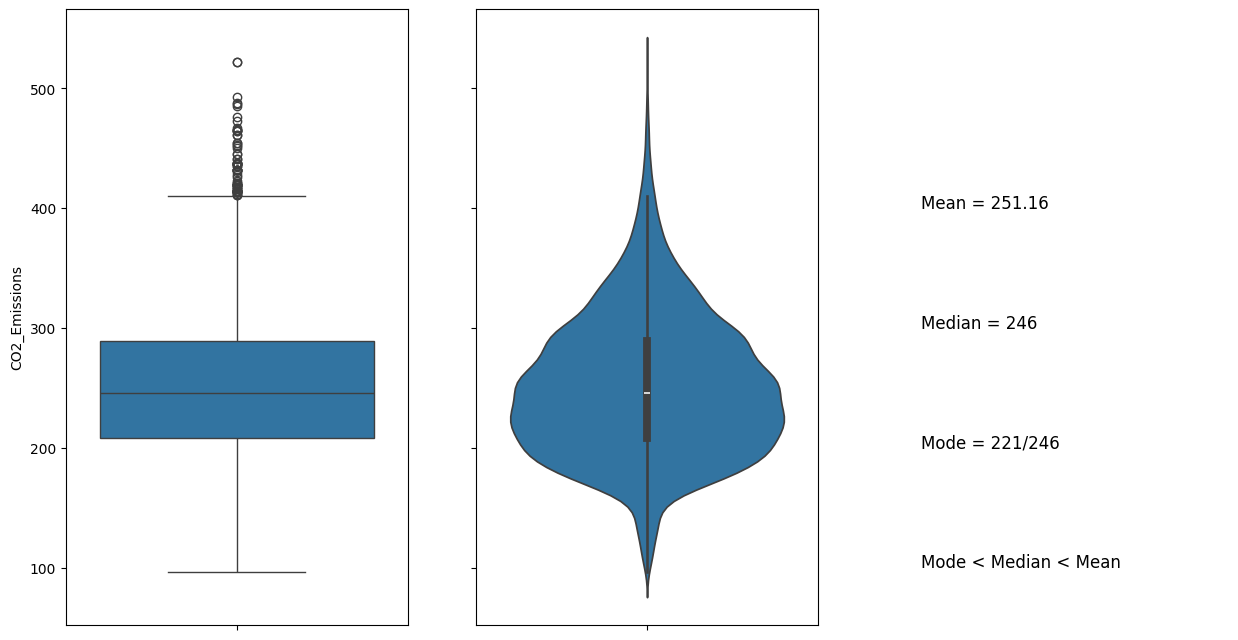

In [ ]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sns.boxplot(y=data['CO2_Emissions'], orient="v", ax = axes[0])
sns.violinplot(y=data['CO2_Emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

### 4.2.5 Analyse Relationship between Target and Independent Variables <a id='analyze_tar_ind_var'></a>

In [ ]:
make_co2 = data.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('Model')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()

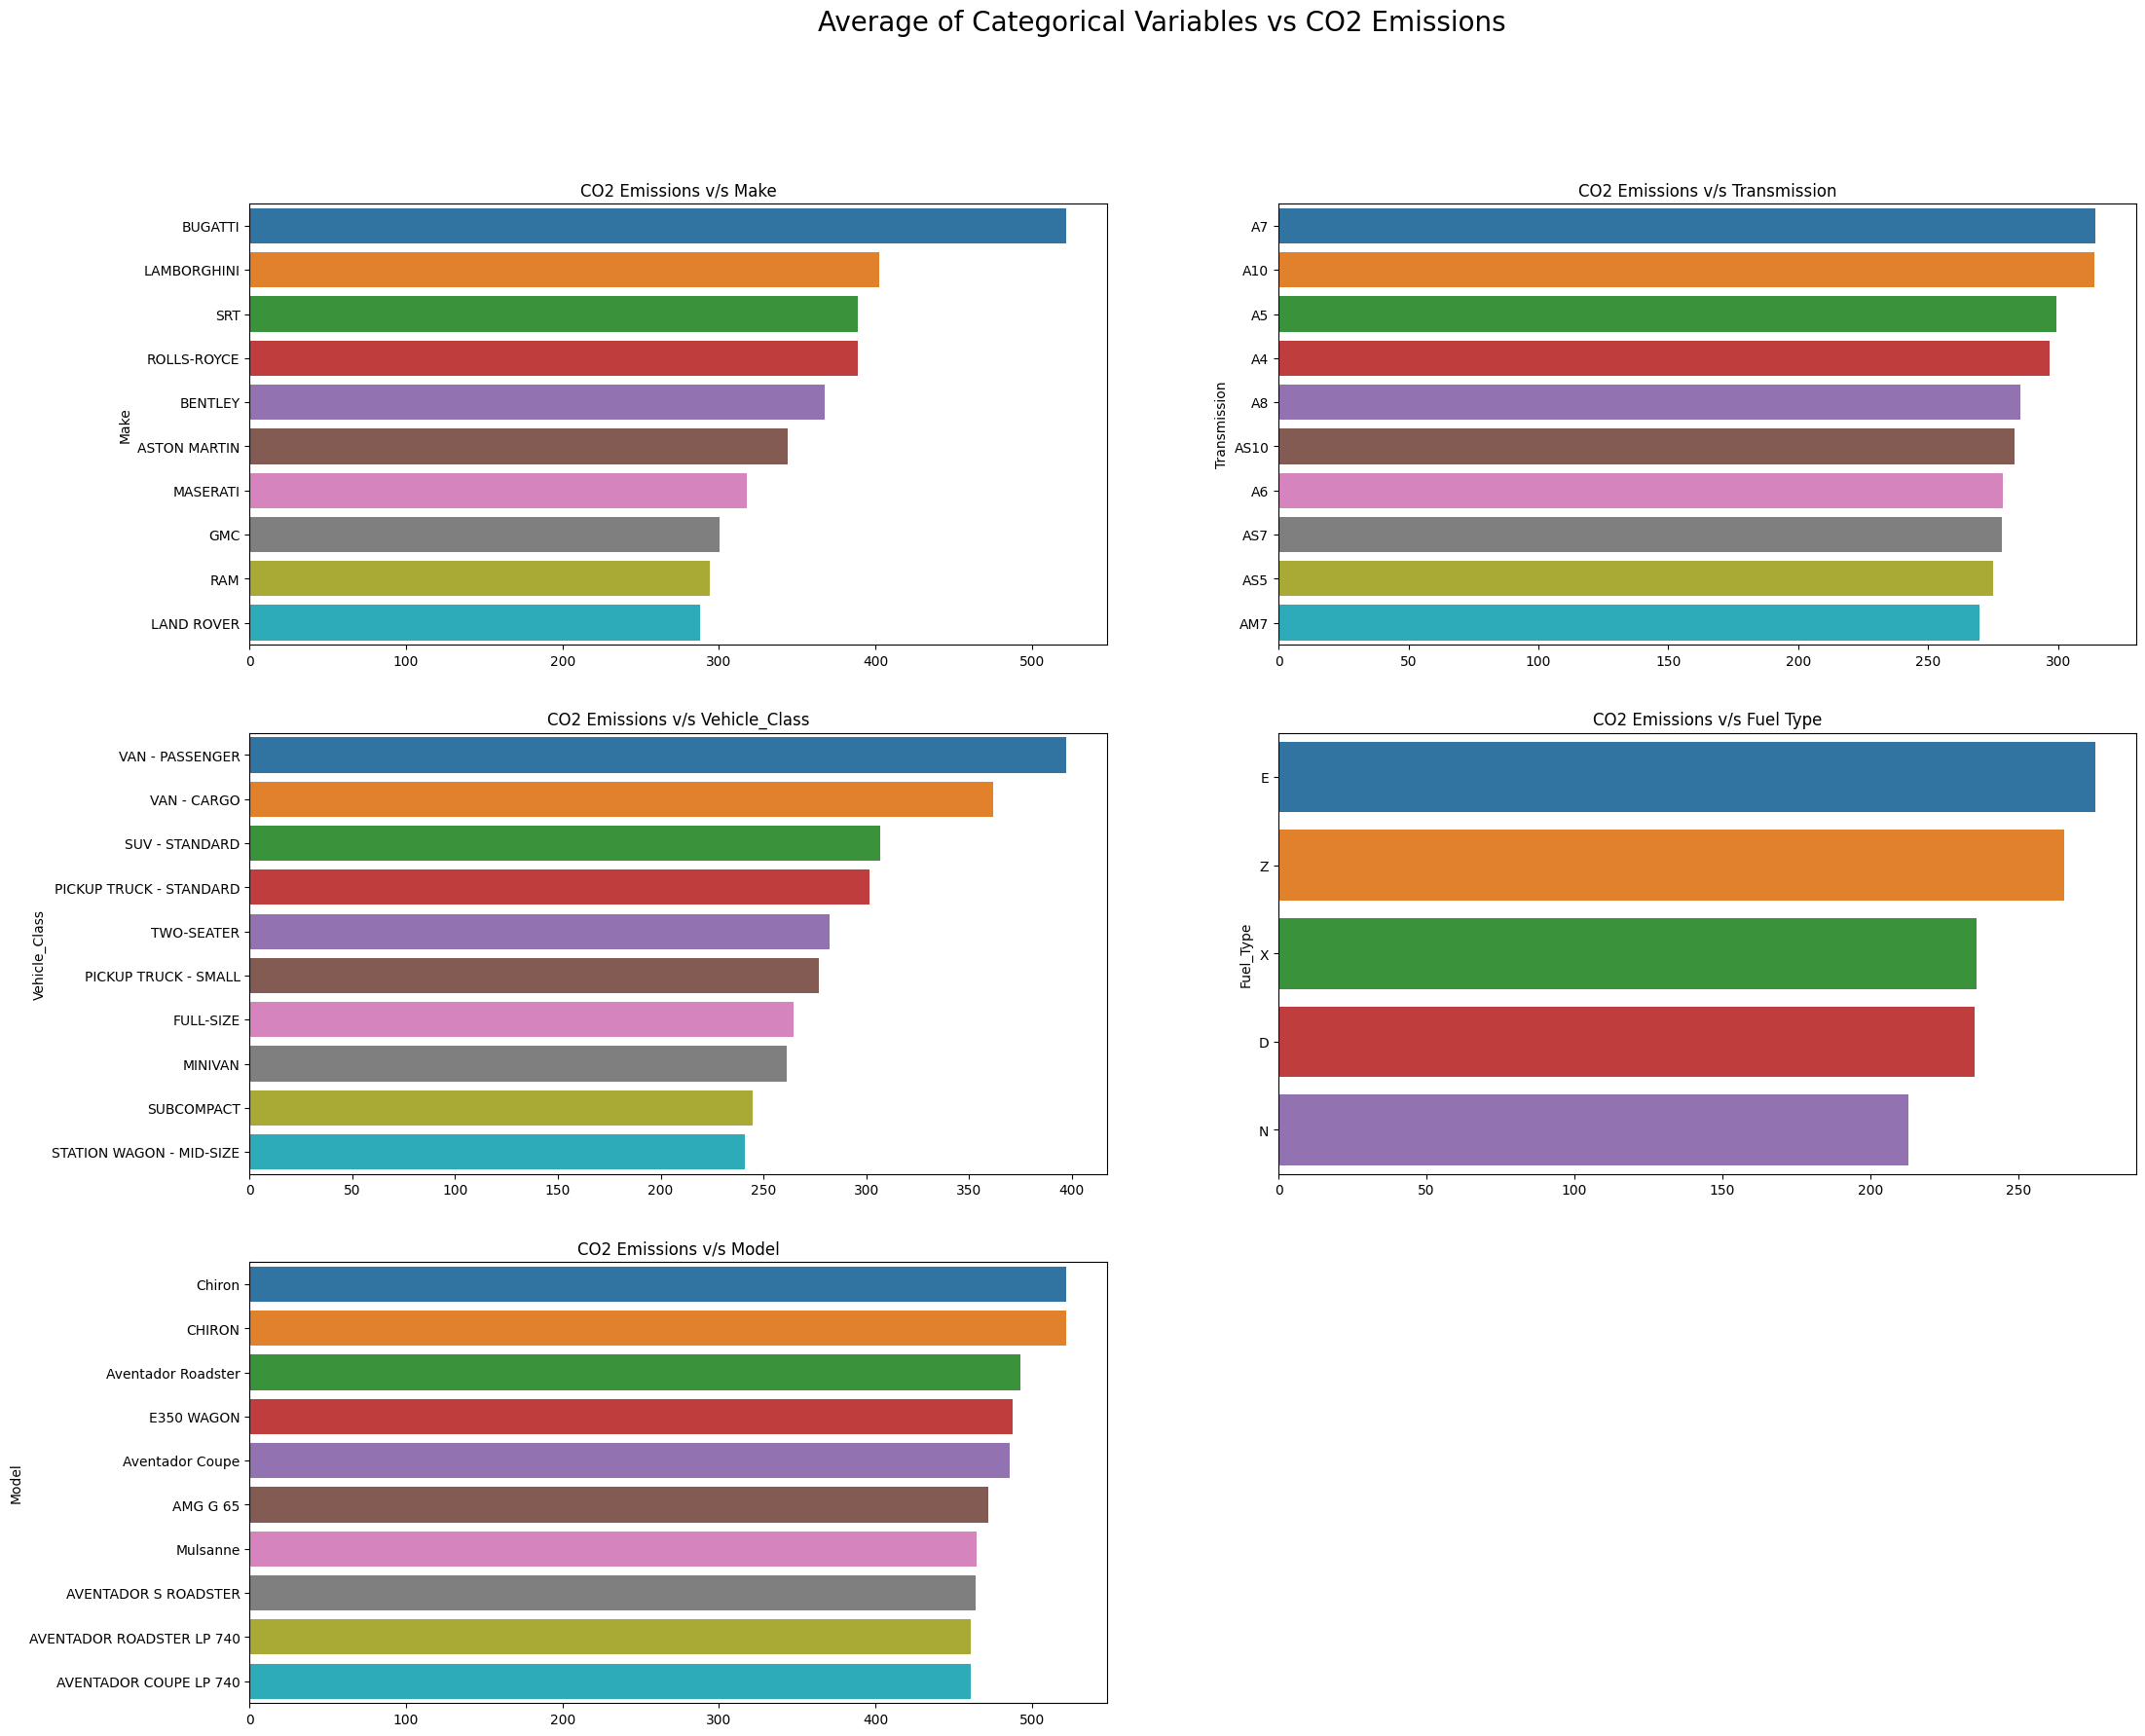

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index, palette='tab10')
axes[0][0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index, palette='tab10')
axes[0][1].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index, palette='tab10')
axes[1][0].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index, palette='tab10')
axes[1][1].set_title('CO2 Emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index,  palette='tab10')
axes[2][0].set_title('CO2 Emissions v/s Model')


fig.delaxes(axes[2][1])
plt.show()

1. CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car
2. CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model
3. CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2
4. CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2
5. CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E are emitting the most CO2

**Relationship between Cylinders and CO2 Emissions**

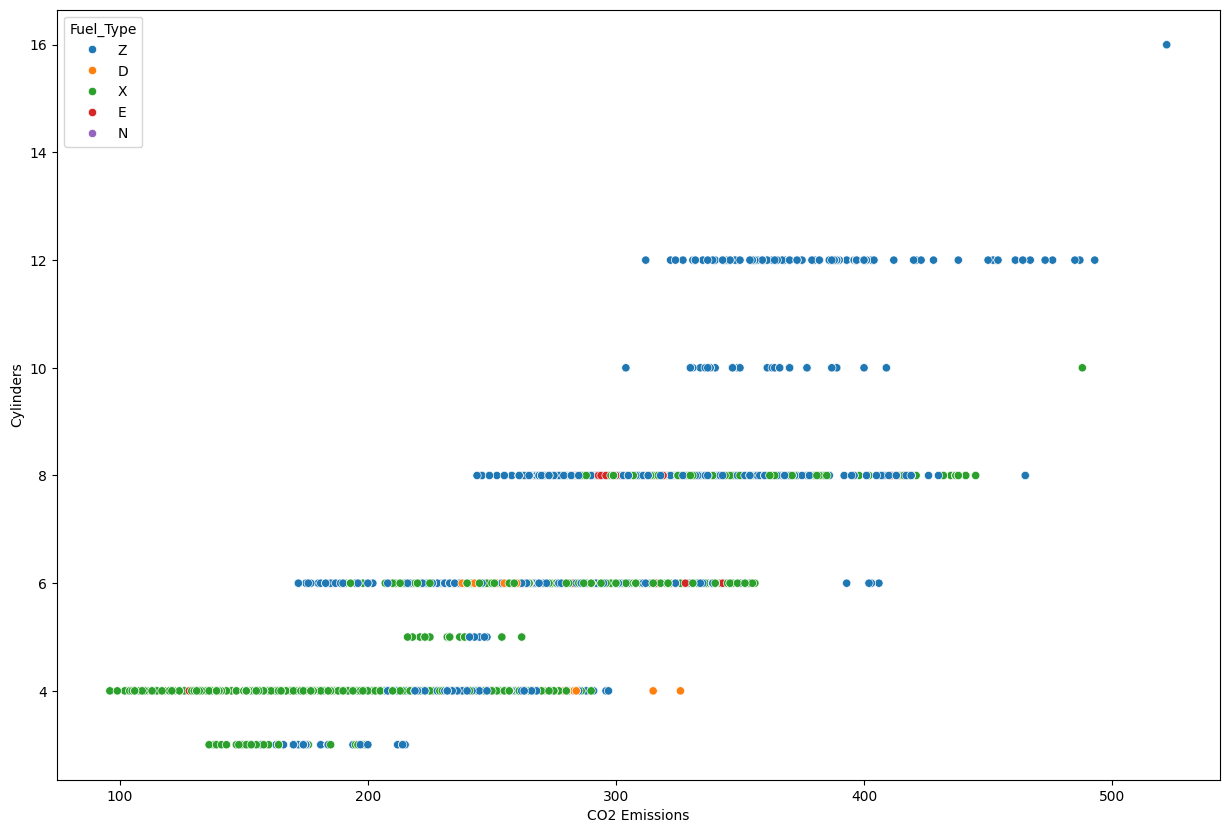

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot(x='CO2_Emissions', y='Cylinders', data=data, hue='Fuel_Type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

From the above scatter plot we can see that:
1. As the number of cylinders increase, the CO2 emissions increase
2. Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2
3. Fuel Type Z results in more CO2 emissions than the other

<Figure size 1000x500 with 0 Axes>

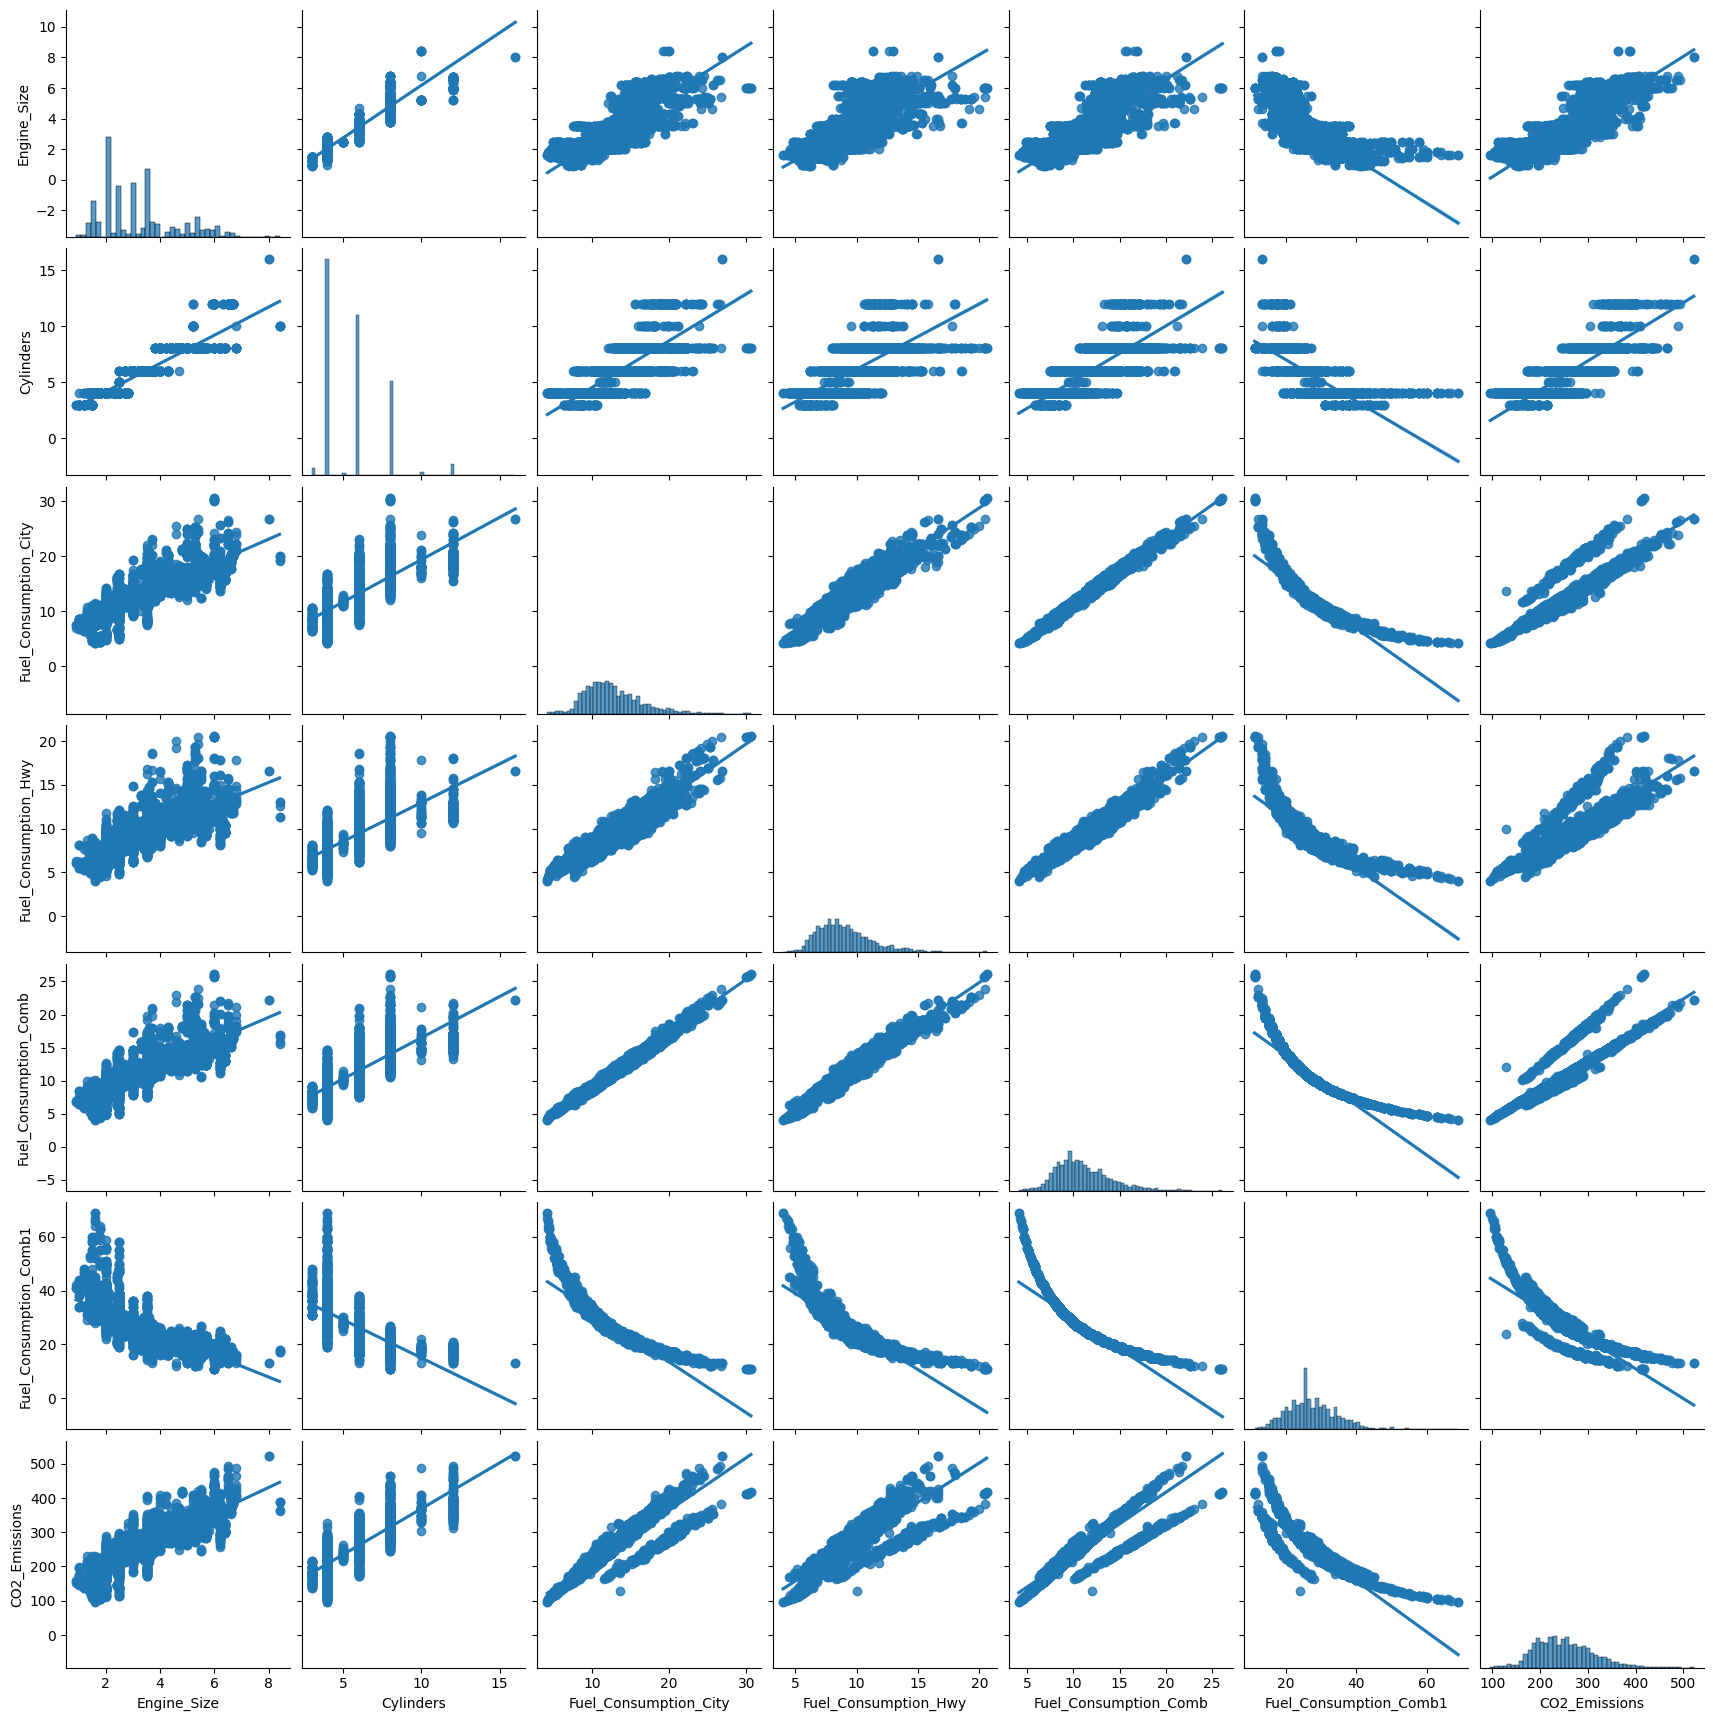

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data,kind="reg")
plt.show()

1. Fuel_Consumption_Comb1 shows a negative relation with all the other numerical variables
2. Fuel_Consumption_City and Fuel_Consumption_Hwy are strongly postively related

### 4.2.6 Feature Engineering <a id='feature_eng'></a>

Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
<br>
There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars

In [ ]:
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [ ]:
data.drop(['Make'], inplace=True, axis=1)

data['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [ ]:
data['Make_Type'].value_counts()

,count
Make_Type,
General,2776
Premium,2731
Sports,546
Luxury,229


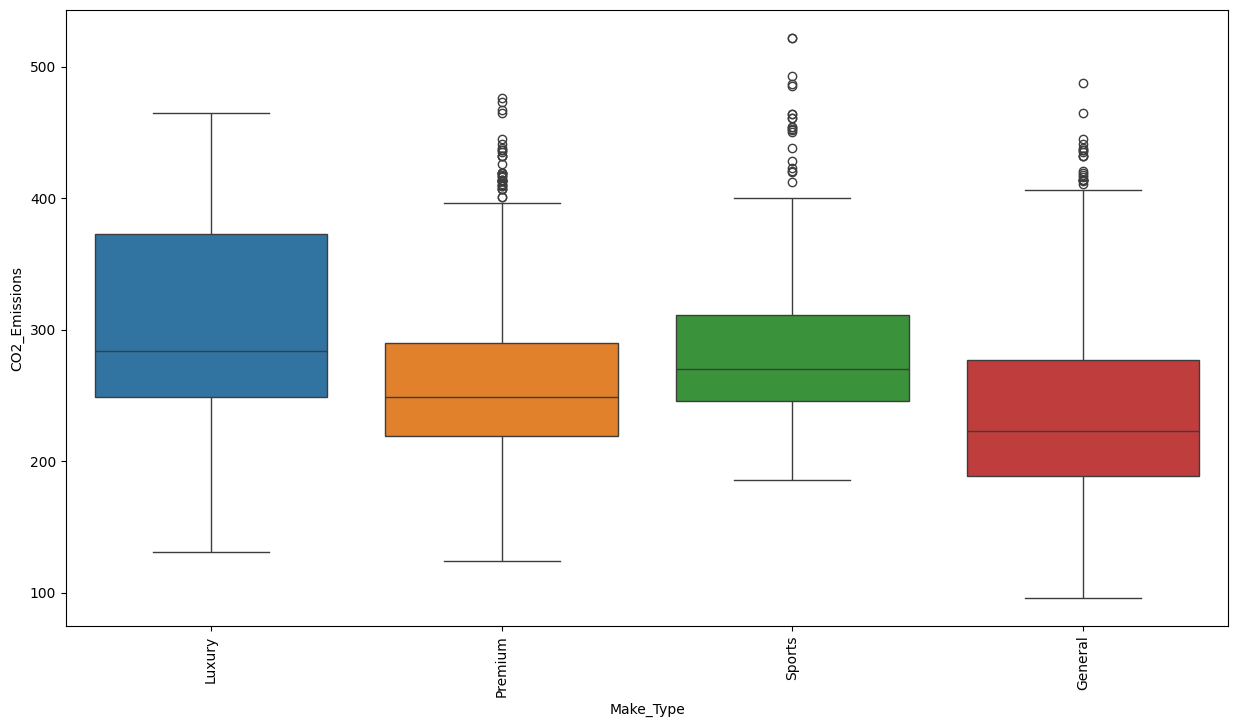

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Make_Type", y="CO2_Emissions", data=data, palette='tab10')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that Sports cars and Luxury cars emit more CO2 compared to Premium and General use cars

Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
<br>
There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck

In [ ]:
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [ ]:
data.drop(['Vehicle_Class'], inplace=True,  axis=1)

data['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

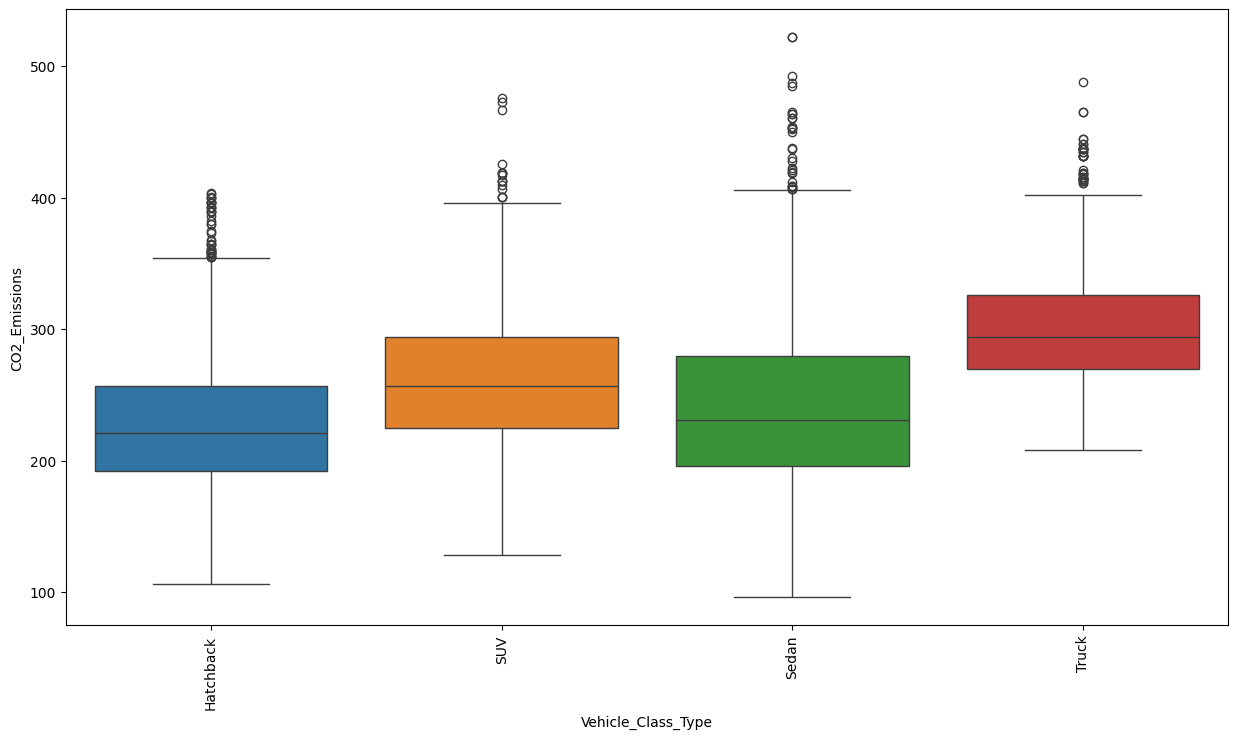

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Vehicle_Class_Type", y="CO2_Emissions", data=data, palette='tab10')
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that the bigger the cars are the more CO2 they emit

# 5. Data Preprocessing <a id='data_pre'></a>

In [ ]:
data.drop(['Model'],axis=1,inplace=True)

Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , we have dropped this column

## 5.1 Outliers <a id='out'></a>

### 5.1.1 Discovery of Outliers<a id='dis_out'></a>

In [ ]:
df_num_features=data.select_dtypes(include=np.number)

**Identifying outliers using IQR**

In [ ]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine_Size               1.700000
Cylinders                 2.000000
Fuel_Consumption_City     4.600000
Fuel_Consumption_Hwy      2.800000
Fuel_Consumption_Comb     3.800000
Fuel_Consumption_Comb1   10.000000
CO2_Emissions            81.000000
dtype: float64


In [ ]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine_Size are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel_Consumption_City are 116
Total number of Outliers in column Fuel_Consumption_Hwy are 150
Total number of Outliers in column Fuel_Consumption_Comb are 115
Total number of Outliers in column Fuel_Consumption_Comb1 are 95
Total number of Outliers in column CO2_Emissions are 74


**Visualizing outliers using Boxplots**

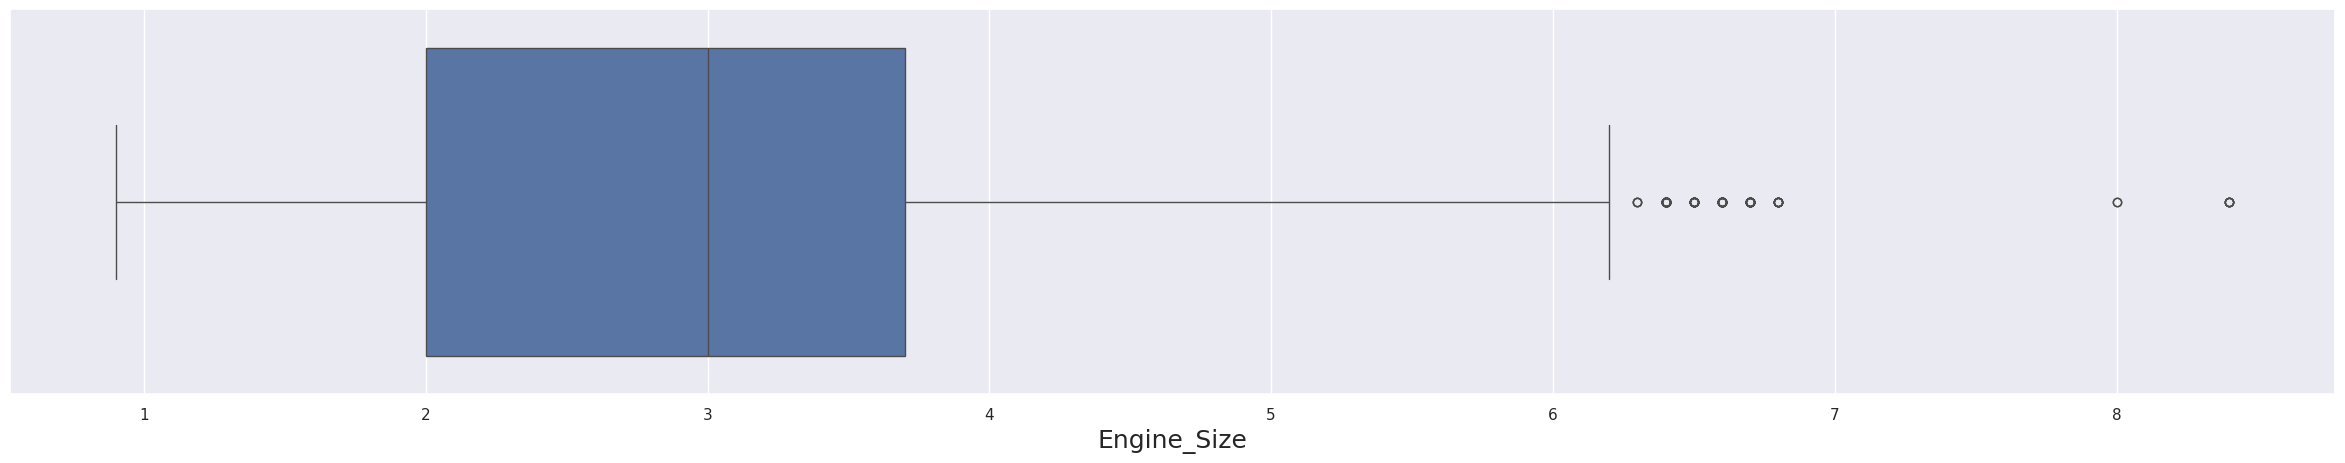

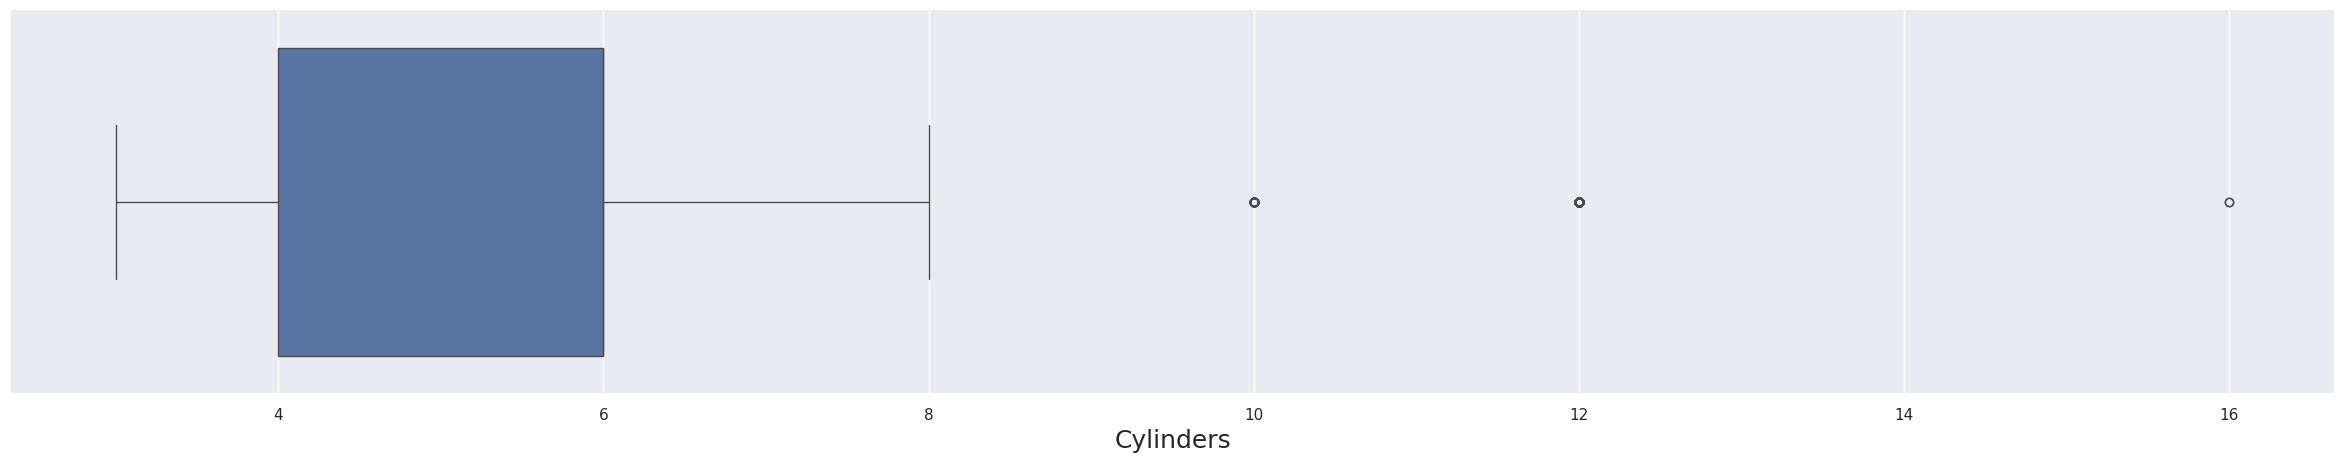

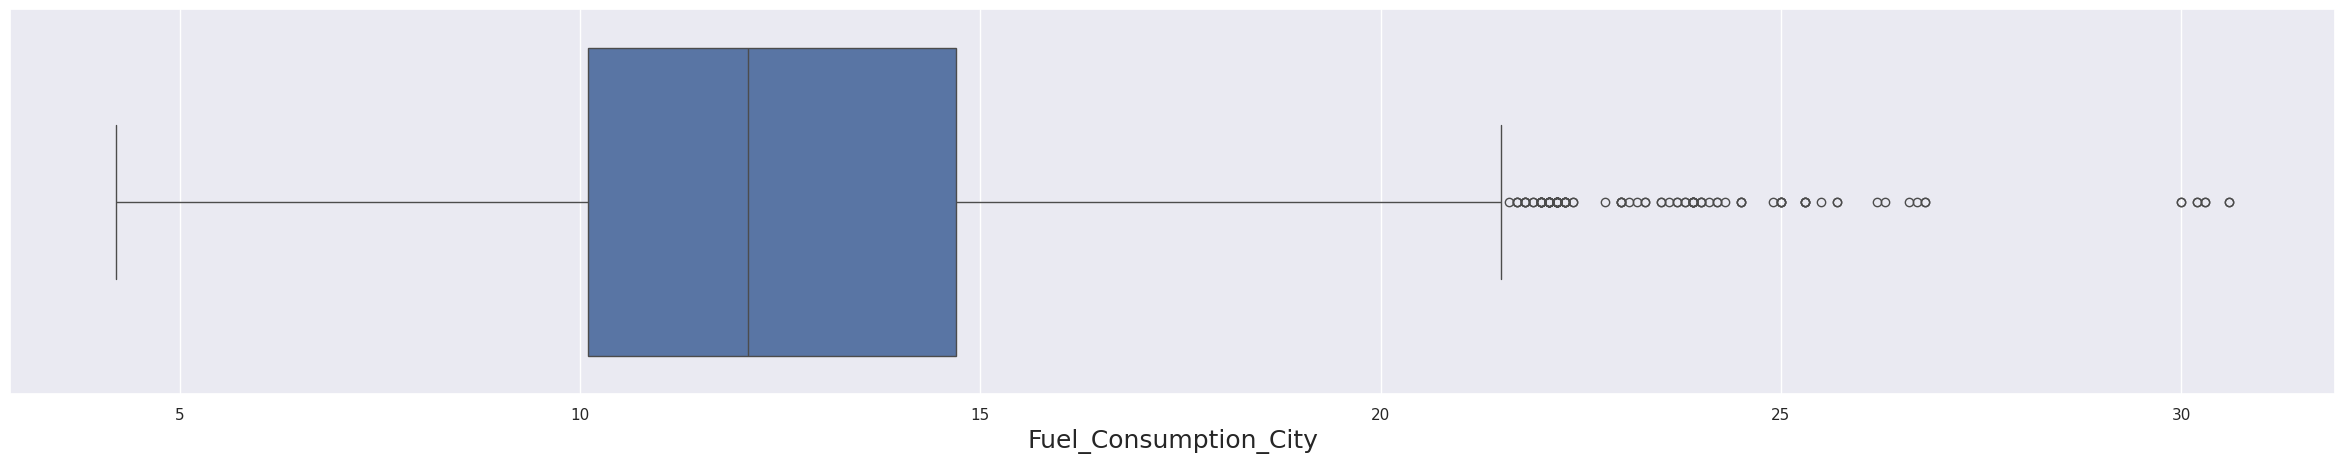

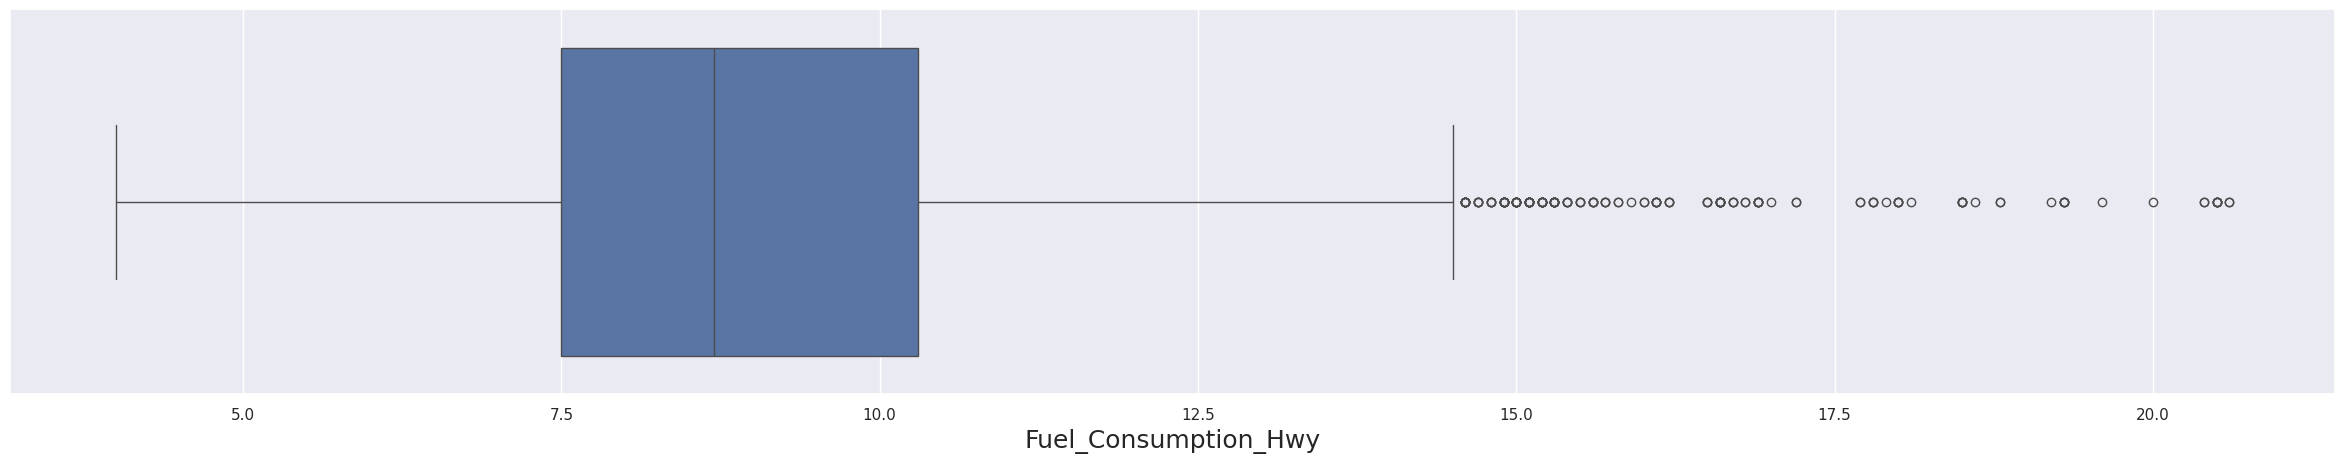

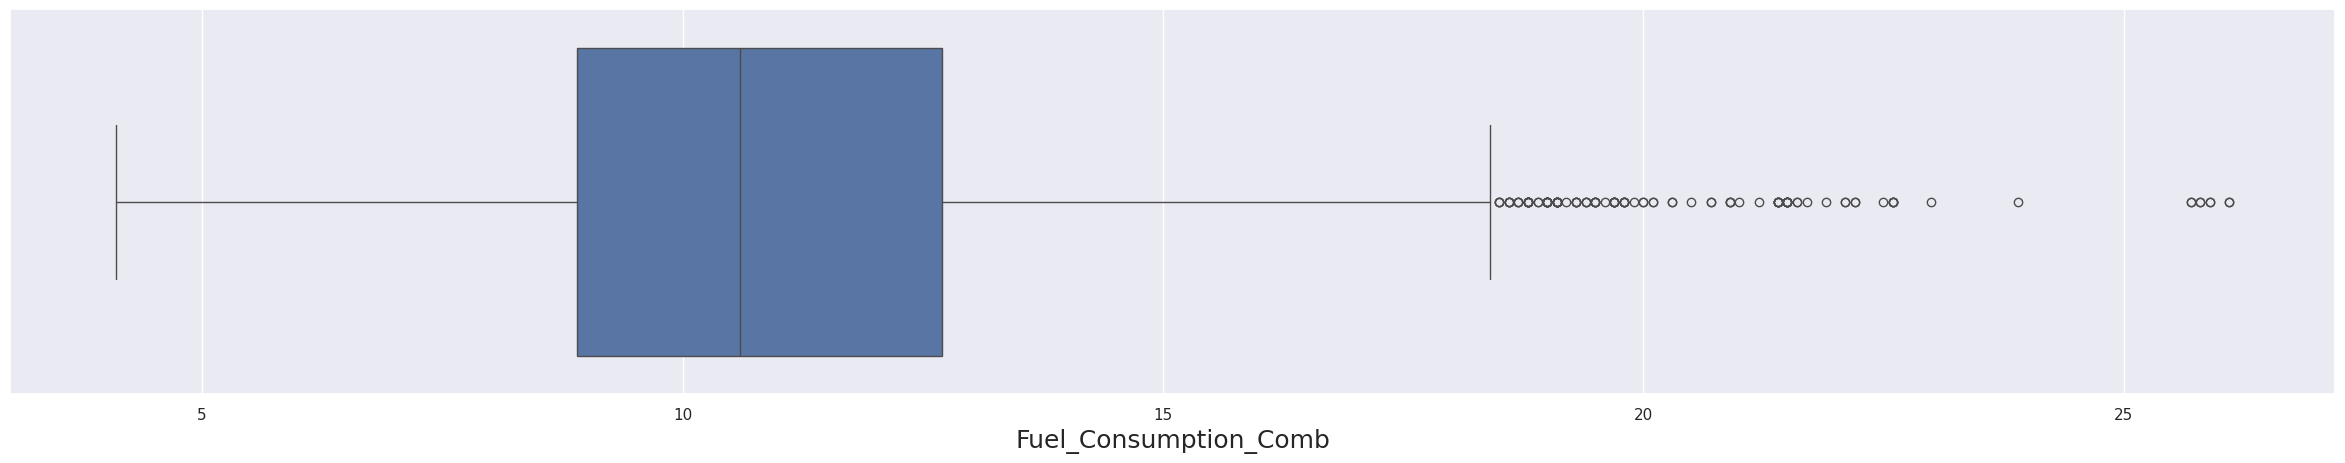

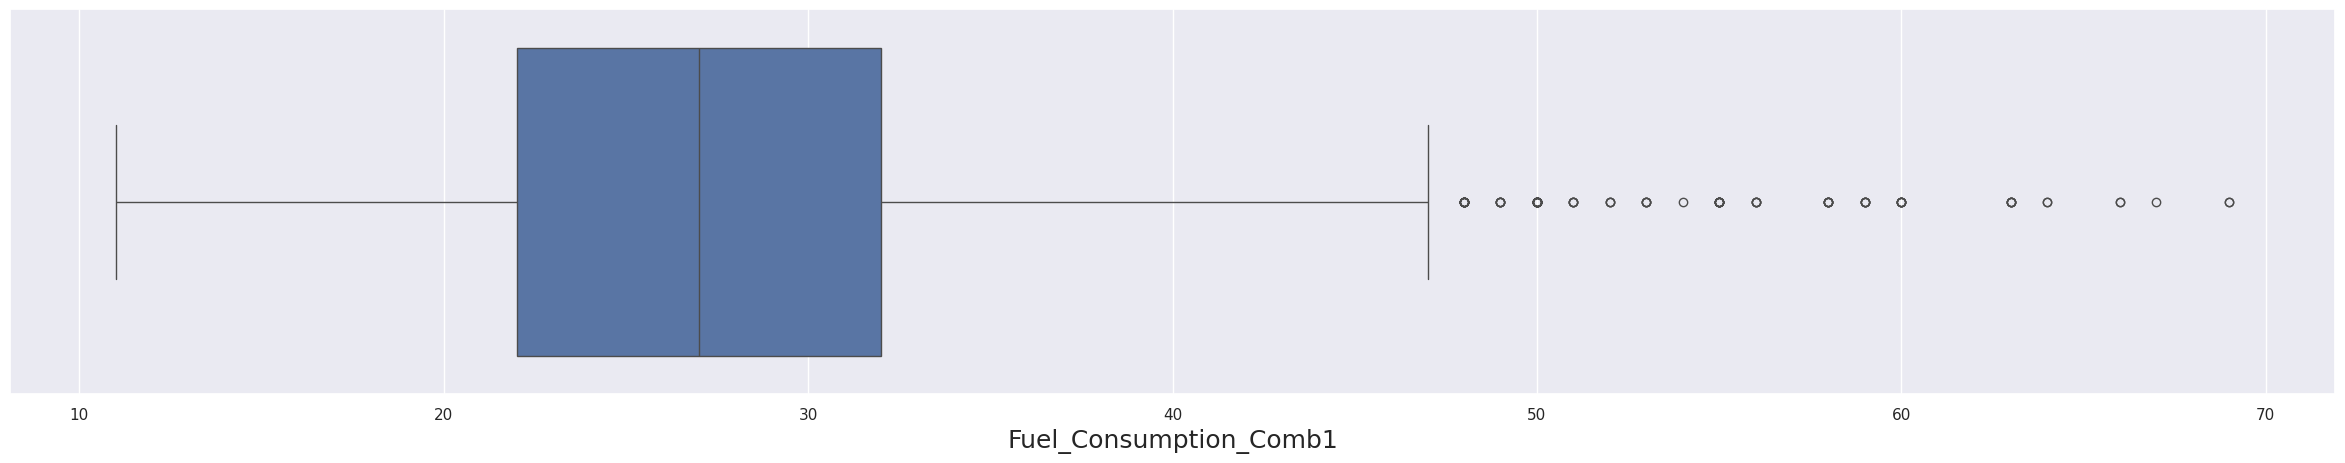

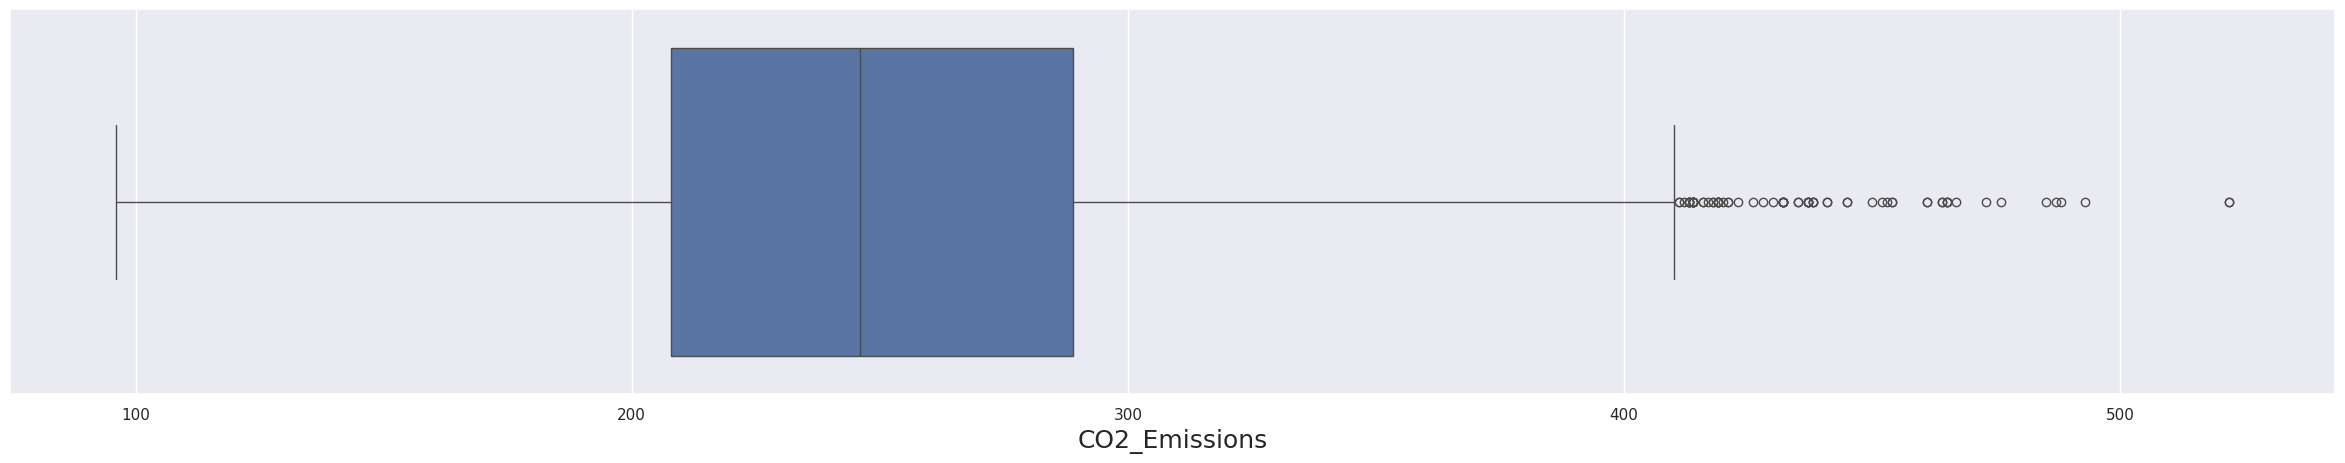

In [ ]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

### 5.1.2 Removal of Outliers<a id='rem_out'></a>

**Checking the normality of numeric features**

In [ ]:
stat, p_value = shapiro(df_num_features)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185014597911467
P-Value: 4.371807141727005e-137


Since the numeric features are not normal we are removing the outliers using IQR method

In [ ]:
df_num_features_filtered = df_num_features[~((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_indices = df_num_features_filtered.index
data = data.loc[filtered_indices]
data.reset_index(inplace=True, drop=True)

### 5.1.3 Re-checking Correlation<a id='rec_cor'></a>

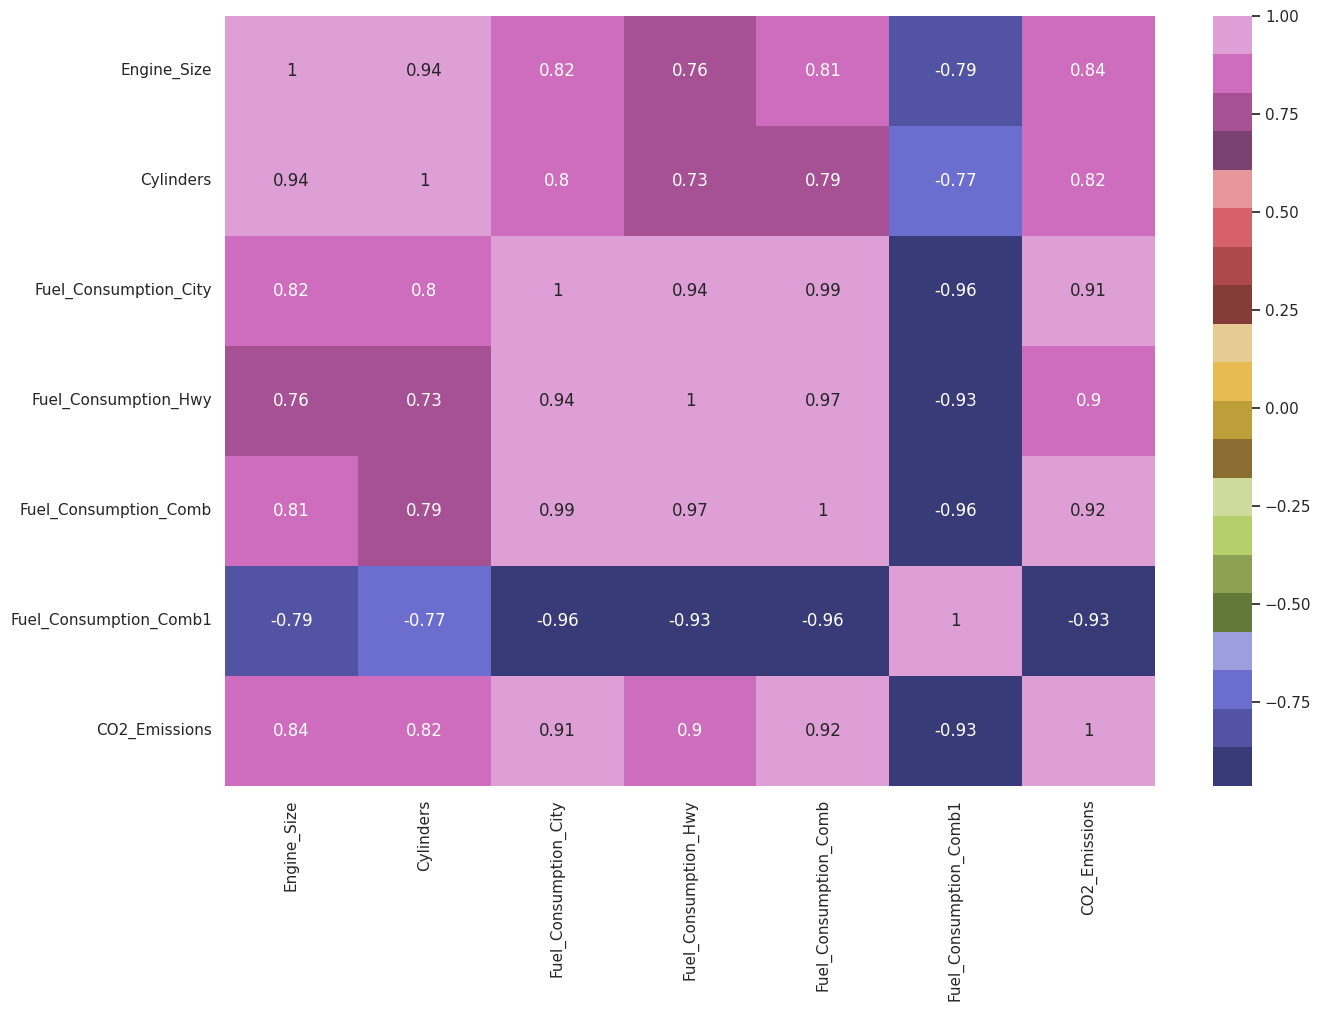

In [ ]:
data_num_features = data.select_dtypes(include=np.number)

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

There has been a slight change with respect to the correlation between numeric values

## 5.2 Categorical Encoding<a id='cat_enc'></a>

In [ ]:
df_dummies = pd.get_dummies(data = data[["Fuel_Type","Transmission","Make_Type","Vehicle_Class_Type"]], drop_first = True)

df_num_features=data.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [ ]:
df_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.000000,4,9.900000,6.700000,8.500000,33,196,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2.400000,4,11.200000,7.700000,9.600000,29,221,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,3.500000,6,12.700000,9.100000,11.100000,25,255,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,3.500000,6,12.100000,8.700000,10.600000,27,244,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,3.500000,6,11.900000,7.700000,10.000000,28,230,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


# 6. Multiple Linear Regression Models<a id='bui_mlr_mod'></a>

In [ ]:
X = df_comb.drop(['CO2_Emissions'], axis=1)
y = df_comb['CO2_Emissions']

## 6.1 Multiple Linear Regression - Basic Model<a id='bas_mod'></a>

In [ ]:
X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
print("X dtypes:\n", X.dtypes)
print("y dtype:\n", y.dtypes)


X dtypes:
 const                       float64
Engine_Size                 float64
Cylinders                     int64
Fuel_Consumption_City       float64
Fuel_Consumption_Hwy        float64
Fuel_Consumption_Comb       float64
Fuel_Consumption_Comb1        int64
Fuel_Type_E                    bool
Fuel_Type_N                    bool
Fuel_Type_X                    bool
Fuel_Type_Z                    bool
Transmission_A4                bool
Transmission_A5                bool
Transmission_A6                bool
Transmission_A7                bool
Transmission_A8                bool
Transmission_A9                bool
Transmission_AM5               bool
Transmission_AM6               bool
Transmission_AM7               bool
Transmission_AM8               bool
Transmission_AM9               bool
Transmission_AS10              bool
Transmission_AS4               bool
Transmission_AS5               bool
Transmission_AS6               bool
Transmission_AS7               bool
Transmission_AS8 

In [ ]:
bool_cols = X_train.select_dtypes(include='bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

# Re-check types
print(X_train.dtypes)

const                       float64
Engine_Size                 float64
Cylinders                     int64
Fuel_Consumption_City       float64
Fuel_Consumption_Hwy        float64
Fuel_Consumption_Comb       float64
Fuel_Consumption_Comb1        int64
Fuel_Type_E                   int64
Fuel_Type_N                   int64
Fuel_Type_X                   int64
Fuel_Type_Z                   int64
Transmission_A4               int64
Transmission_A5               int64
Transmission_A6               int64
Transmission_A7               int64
Transmission_A8               int64
Transmission_A9               int64
Transmission_AM5              int64
Transmission_AM6              int64
Transmission_AM7              int64
Transmission_AM8              int64
Transmission_AM9              int64
Transmission_AS10             int64
Transmission_AS4              int64
Transmission_AS5              int64
Transmission_AS6              int64
Transmission_AS7              int64
Transmission_AS8            

In [ ]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.796e+04
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:26:56   Log-Likelihood:                -11160.
No. Observations:                4071   AIC:                         2.240e+04
Df Residuals:                    4030   BIC:                         2.266e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       83.7313      2.627     31.875      0.000      78.581      88.881
Engine_Size                  0.4905      0.169      2.909      0.004       0.160       0.821
Cylinders                   -0.1570      0.129     -1.216      0.224      -0.410       0.096
Fuel_Consumption_City        5.7081      0.803      7.107      0.000       4.133       7.283
Fuel_Consumption_Hwy         5.6271      0.669      8.414      0.000       4.316       6.938
Fuel_Consumption_Comb        9.7687      1.457      6.703      0.000       6.911      12.626
Fuel_Consumption_Comb1      -0.8494      0.044    -19.197      0.000      -0.936      -0.763
Fuel_Type_E               -134.2346      0.595   -225.582      0.000    -135.401    -133.068
Fuel_Type_N               2.785e-14   9.68e-15      2.878      0.004    8.88e-15    4.68e-14
Fuel_Type_X                -31.5723      0.412    -76.684      0.000     -32.379     -30.765
Fuel_Type_Z                -32.1212      0.435    -73.847      0.000     -32.974     -31.268
Transmission_A4             -4.4037      1.099     -4.009      0.000      -6.557      -2.250
Transmission_A5             -4.7141      0.976     -4.831      0.000      -6.627      -2.801
Transmission_A6             -4.5671      0.852     -5.360      0.000      -6.238      -2.897
Transmission_A7             -2.5838      1.151     -2.245      0.025      -4.840      -0.327
Transmission_A8             -2.4133      0.859     -2.811      0.005      -4.097      -0.730
Transmission_A9             -1.5185      0.884     -1.719      0.086      -3.251       0.214
Transmission_AM5            -0.7120      2.358     -0.302      0.763      -5.335       3.911
Transmission_AM6            -2.9152      0.975     -2.989      0.003      -4.827      -1.003
Transmission_AM7            -2.9954      0.885     -3.384      0.001      -4.731      -1.260
Transmission_AM8            -2.7283      1.091     -2.500      0.012      -4.868      -0.589
Transmission_AM9          6.505e-15   1.16e-15      5.596      0.000    4.23e-15    8.78e-15
Transmission_AS10           -2.3211      0.914     -2.539      0.011      -4.113      -0.529
Transmission_AS4            -7.3040      3.873     -1.886      0.059     -14.897       0.289
Transmission_AS5            -5.8421      1.245     -4.692      0.000      -8.283      -3.401
Transmission_AS6            -3.6308      0.855     -4.244      0.000      -5.308      -1.954
Transmission_AS7            -4.0525      0.872     -4.646      0.000      -5.763      -2.343
Transmission_AS8            -2.5009      0.849     -2.947      0.003      -4.165      -0.837
Transmission_AS9            -2.6968      0.993     -2.715      0.007      -4.644      -0.750
Transmission_AV             -2.9337      0.915     -3.206      0.001      -4.727      -1.140
Transmission_A

1. 99.5% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
3. The Condition Number is 1.00e+16 which suggests that there is severe mutli-collinearity
4. The features taken into consideration are of different scales

## 6.2 Feature Transformation<a id='fea_tra'></a>

In [ ]:
df_num_features.skew()

,0
Engine_Size,0.792424
Cylinders,0.511038
Fuel_Consumption_City,0.535297
Fuel_Consumption_Hwy,0.671428
Fuel_Consumption_Comb,0.578857
Fuel_Consumption_Comb1,0.395943
CO2_Emissions,0.394186


Since the skewness is relatively low, there is no need to perform any further transformations to reduce skewness

## 6.3 Feature Scaling<a id='fea_sca'></a>

In [ ]:
for col in df_num_features.columns:
    print("Column ", col, " :", stats.shapiro(df_num_features[col]))

Column  Engine_Size  : ShapiroResult(statistic=0.9221100764905708, pvalue=1.0507556353241845e-47)
Column  Cylinders  : ShapiroResult(statistic=0.7948747243278652, pvalue=3.1962163399063198e-65)
Column  Fuel_Consumption_City  : ShapiroResult(statistic=0.9760541138544153, pvalue=3.585400504793186e-30)
Column  Fuel_Consumption_Hwy  : ShapiroResult(statistic=0.9660734414633733, pvalue=6.454897604302943e-35)
Column  Fuel_Consumption_Comb  : ShapiroResult(statistic=0.9723236565057775, pvalue=4.23672935041226e-32)
Column  Fuel_Consumption_Comb1  : ShapiroResult(statistic=0.9820072595964404, pvalue=1.4980430364312958e-26)
Column  CO2_Emissions  : ShapiroResult(statistic=0.9829149100817964, pvalue=6.384358029540029e-26)


Since none of the numerical features are normally distributed (p-value<0.05) , we will perform Min-Max normalisation to scale the data

In [ ]:
df_num_features.drop('CO2_Emissions',axis=1,inplace=True)

In [ ]:
mms = MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfx = pd.DataFrame(mms.fit_transform(df_num_features), columns = ['Engine_Size','Cylinders','Fuel_Consumption_City',
                                                                'Fuel_Consumption_Hwy','Fuel_Consumption_Comb','Fuel_Consumption_Comb1'])

In [ ]:
df = pd.concat([dfx, df_dummies], axis = 1)
df.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,0.207547,0.200000,0.273885,0.220000,0.206612,0.548387,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,0.283019,0.200000,0.356688,0.320000,0.297521,0.419355,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,0.490566,0.600000,0.452229,0.460000,0.421488,0.290323,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,0.490566,0.600000,0.414013,0.420000,0.380165,0.354839,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,0.490566,0.600000,0.401274,0.320000,0.330579,0.387097,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


## 6.4 Multiple Linear Regression -  After Feature Scaling<a id='mod_aft_sca'></a>

In [ ]:
X = df.copy()
X = sm.add_constant(X)

In [ ]:
print("X dtypes:\n", X_train.dtypes)
print("y dtype:\n", y_train.dtypes)


X dtypes:
 const                       float64
Engine_Size                 float64
Cylinders                     int64
Fuel_Consumption_City       float64
Fuel_Consumption_Hwy        float64
Fuel_Consumption_Comb       float64
Fuel_Consumption_Comb1        int64
Fuel_Type_E                   int64
Fuel_Type_N                   int64
Fuel_Type_X                   int64
Fuel_Type_Z                   int64
Transmission_A4               int64
Transmission_A5               int64
Transmission_A6               int64
Transmission_A7               int64
Transmission_A8               int64
Transmission_A9               int64
Transmission_AM5              int64
Transmission_AM6              int64
Transmission_AM7              int64
Transmission_AM8              int64
Transmission_AM9              int64
Transmission_AS10             int64
Transmission_AS4              int64
Transmission_AS5              int64
Transmission_AS6              int64
Transmission_AS7              int64
Transmission_AS8 

In [ ]:
# Identify bool columns
bool_cols = X.select_dtypes(include='bool').columns

# Convert them to int
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


MLR_model2 = sm.OLS(y_train, X_train).fit()
MLR_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.796e+04
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:26:57   Log-Likelihood:                -11160.
No. Observations:                4071   AIC:                         2.240e+04
Df Residuals:                    4030   BIC:                         2.266e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      186.0106      1.925     96.612      0.000     182.236     189.785
Engine_Size                  2.5999      0.894      2.909      0.004       0.848       4.352
Cylinders                   -0.7849      0.645     -1.216      0.224      -2.050       0.480
Fuel_Consumption_City       89.6172     12.610      7.107      0.000      64.894     114.340
Fuel_Consumption_Hwy        56.2710      6.688      8.414      0.000      43.159      69.383
Fuel_Consumption_Comb      118.2018     17.635      6.703      0.000      83.628     152.775
Fuel_Consumption_Comb1     -26.3326      1.372    -19.197      0.000     -29.022     -23.643
Fuel_Type_E               -134.2346      0.595   -225.582      0.000    -135.401    -133.068
Fuel_Type_N              -5.335e-14   1.91e-13     -0.279      0.780   -4.28e-13    3.22e-13
Fuel_Type_X                -31.5723      0.412    -76.684      0.000     -32.379     -30.765
Fuel_Type_Z                -32.1212      0.435    -73.847      0.000     -32.974     -31.268
Transmission_A4             -4.4037      1.099     -4.009      0.000      -6.557      -2.250
Transmission_A5             -4.7141      0.976     -4.831      0.000      -6.627      -2.801
Transmission_A6             -4.5671      0.852     -5.360      0.000      -6.238      -2.897
Transmission_A7             -2.5838      1.151     -2.245      0.025      -4.840      -0.327
Transmission_A8             -2.4133      0.859     -2.811      0.005      -4.097      -0.730
Transmission_A9             -1.5185      0.884     -1.719      0.086      -3.251       0.214
Transmission_AM5            -0.7120      2.358     -0.302      0.763      -5.335       3.911
Transmission_AM6            -2.9152      0.975     -2.989      0.003      -4.827      -1.003
Transmission_AM7            -2.9954      0.885     -3.384      0.001      -4.731      -1.260
Transmission_AM8            -2.7283      1.091     -2.500      0.012      -4.868      -0.589
Transmission_AM9         -2.309e-15   5.14e-15     -0.449      0.653   -1.24e-14    7.76e-15
Transmission_AS10           -2.3211      0.914     -2.539      0.011      -4.113      -0.529
Transmission_AS4            -7.3040      3.873     -1.886      0.059     -14.897       0.289
Transmission_AS5            -5.8421      1.245     -4.692      0.000      -8.283      -3.401
Transmission_AS6            -3.6308      0.855     -4.244      0.000      -5.308      -1.954
Transmission_AS7            -4.0525      0.872     -4.646      0.000      -5.763      -2.343
Transmission_AS8            -2.5009      0.849     -2.947      0.003      -4.165      -0.837
Transmission_AS9            -2.6968      0.993     -2.715      0.007      -4.644      -0.750
Transmission_AV             -2.9337      0.915     -3.206      0.001      -4.727      -1.140
Transmission_A

1. 99.5% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
3. The Condition Number is 1.24e+16 which suggests that there is severe mutli-collinearity

## 6.5 Assumptions Before Multiple Linear Regression Model<a id="ass_bef"></a>

### 6.5.1 Assumption #1: If Target Variable is Numeric<a id="tgt_num"></a>

In [ ]:
target = df_comb['CO2_Emissions']
target.dtype

dtype('int64')

### 6.5.2 Assumption #2: Presence of Multi-Collinearity<a id="pre_mul_col"></a>

In [ ]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_num_features.values, i) for i in range(df_num_features.shape[1])]
vif["Features"] = df_num_features.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,67513.975578,Fuel_Consumption_Comb
1,26997.179323,Fuel_Consumption_City
2,9477.817353,Fuel_Consumption_Hwy
3,115.604448,Cylinders
4,65.575193,Engine_Size
5,9.890684,Fuel_Consumption_Comb1


Since all the features except Fuel_Consumption_Comb1 have a VIF value greater than 10 we cannot proceed with VIF method else we will lose all our features. Hence , we will proceed with PCA

In [ ]:
sklearn_pca = PCA()
pcafit = sklearn_pca.fit(df)

pcafit.explained_variance_

array([6.18955498e-01, 3.48264279e-01, 2.56312842e-01, 1.97512877e-01,
       1.70347494e-01, 1.51201027e-01, 1.25893516e-01, 9.80302503e-02,
       8.32425240e-02, 6.17167187e-02, 5.47251279e-02, 4.88212581e-02,
       4.26929739e-02, 3.99197269e-02, 3.66998364e-02, 3.02644112e-02,
       2.66370205e-02, 2.34989550e-02, 2.26126641e-02, 1.80902105e-02,
       1.70269091e-02, 1.47916869e-02, 1.34959924e-02, 1.20214043e-02,
       1.09677943e-02, 1.05164215e-02, 7.79082866e-03, 6.65624676e-03,
       6.14333272e-03, 5.83560356e-03, 5.22906315e-03, 4.51186650e-03,
       3.31044442e-03, 1.68308430e-03, 1.54745136e-03, 8.86251036e-04,
       7.02700504e-04, 3.69102547e-04, 2.02964736e-04, 1.69839710e-04,
       1.39668115e-04, 7.27367364e-06])

In [ ]:
pcafit.components_

array([[-6.77189897e-02, -1.26606447e-01, -5.92644596e-02, ...,
         1.29955404e-01, -1.19668347e-01,  9.99478153e-02],
       [-2.07344197e-01, -2.52103511e-01, -1.88697791e-01, ...,
        -5.04180156e-01,  5.55812655e-01, -1.36061643e-01],
       [-2.90714615e-01, -3.75368836e-01, -2.24488938e-01, ...,
         3.80126805e-01, -1.95096593e-01, -3.30429165e-01],
       ...,
       [ 2.61435669e-04,  2.15209676e-03, -4.88663170e-03, ...,
         1.08116107e-03, -3.40351077e-04,  1.96076641e-03],
       [ 1.60775439e-02, -6.10950350e-03,  1.96040722e-02, ...,
         4.02220225e-03, -3.37549200e-04,  6.71986118e-03],
       [-2.09341382e-04,  2.53239224e-04, -5.55283917e-01, ...,
         2.56178081e-04,  3.53356748e-05,  3.21933895e-04]])

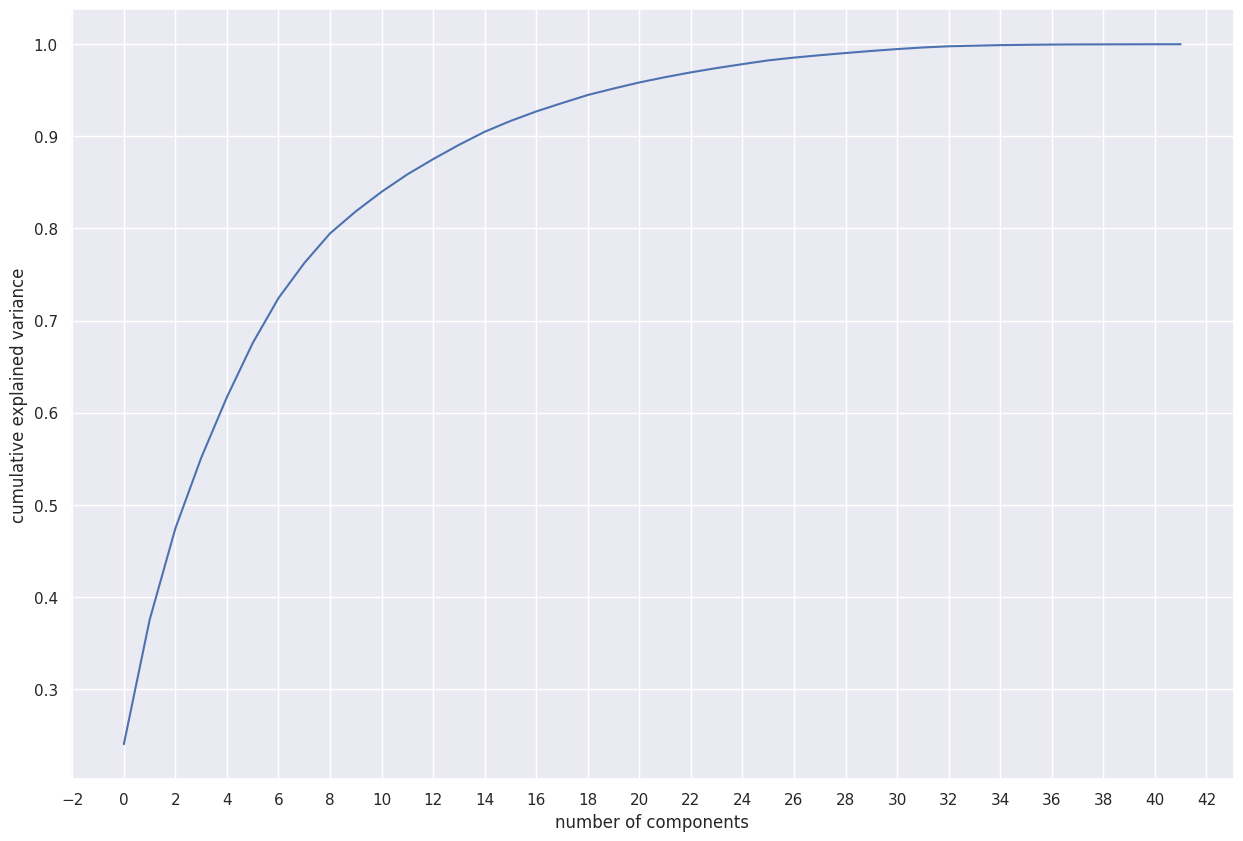

In [ ]:
plt.plot(np.cumsum(pcafit.explained_variance_ratio_))
plt.locator_params(axis="x", nbins=len(pcafit.explained_variance_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As you can see from the above graph, 28 components describe almost 98% of variance in features

In [ ]:
df_pca = sklearn_pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['pca0','pca1','pca2','pca3','pca4','pca5',
                                       'pca6','pca7','pca8','pca9','pca10','pca11',
                                       'pca12','pca13','pca14','pca15','pca16',
                                       'pca17','pca18','pca19','pca20','pca21','pca22',
                                       'pca23','pca24','pca25','pca26','pca27','pca28',
                                       'pca29','pca30','pca31','pca32','pca33',
                                       'pca34','pca35','pca36','pca37','pca38','pca39',
                                       'pca40','pca41'])

df_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41
0,-0.366235,0.349275,0.102637,-0.780444,-0.269253,0.148184,0.185811,-0.242404,0.031876,0.189303,0.431738,0.054067,-0.030326,0.068040,-0.553371,-0.155681,-0.069384,0.215322,0.750003,-0.083564,0.077264,0.005700,-0.051202,0.005207,-0.090200,0.082009,0.104593,-0.035184,0.132749,0.017141,-0.182601,0.947390,-0.141062,-0.074724,0.011357,0.066351,-0.024588,-0.001225,-0.008028,0.001166,0.001612,0.002460
1,-0.408057,0.412626,0.040815,-0.848089,-0.654582,0.140255,-0.269594,0.447218,0.301536,0.087195,0.240628,0.063259,-0.012718,0.131487,-0.475375,-0.147018,-0.108921,0.128223,0.772795,0.036032,0.081108,0.024689,-0.017714,-0.038036,-0.124799,0.088134,-0.054187,-0.091984,0.008939,0.029841,0.014309,-0.001183,0.086267,-0.030307,0.020753,-0.009862,0.005291,-0.001443,-0.006957,0.000067,-0.003142,-0.001730
2,-0.170188,-0.453419,0.020275,-0.953257,0.752466,0.507364,-0.214011,0.074955,0.197907,0.123843,0.371135,0.218405,0.120874,0.259291,-0.487990,-0.125477,-0.004123,0.091326,0.610789,0.083574,0.253714,-0.033182,0.080605,0.010808,-0.148931,0.127472,-0.035227,-0.095067,-0.016493,0.040372,0.091947,0.005283,0.009947,-0.045493,0.027625,-0.011924,0.002946,-0.000355,-0.009800,0.000001,-0.000324,0.001726
3,-0.159950,-0.414894,0.061608,-0.962145,0.740459,0.507800,-0.200692,0.059056,0.189374,0.120551,0.381416,0.233217,0.122150,0.251789,-0.492067,-0.115676,-0.015156,0.097878,0.596924,0.096869,0.299686,-0.044135,0.095948,0.024682,-0.153095,0.128808,-0.033205,-0.095582,-0.017955,0.046942,0.120176,0.015268,0.013390,-0.037740,0.017799,-0.004570,-0.001051,0.000253,-0.010017,0.000500,0.000125,0.002487
4,-0.400255,0.686646,-0.470086,-0.317636,0.765099,0.568020,-0.153807,-0.026254,0.258212,0.064339,0.387488,0.193732,0.128732,0.164553,-0.545688,-0.123090,-0.014621,0.109162,0.623108,0.093806,0.248421,-0.058622,0.044746,0.008880,-0.122783,0.108664,-0.039144,-0.101664,-0.004727,0.036841,0.076713,0.016299,0.022626,-0.054020,0.031110,-0.005656,0.001103,-0.000788,-0.008393,-0.000861,-0.001650,-0.000354


## 6.6 Multiple Linear Regression - After PCA<a id="mod_pca"></a>

In [ ]:
df_pca = sm.add_constant(df_pca)

X = df_pca[['const','pca0','pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model_pca = sm.OLS(y_train, X_train).fit()
MLR_model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:26:57   Log-Likelihood:                -11724.
No. Observations:                4071   AIC:                         2.352e+04
Df Residuals:                    4036   BIC:                         2.374e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0613      0.068   3624.842      0.000     245.928     246.194
pca0         -15.4484      0.087   -178.355      0.000     -15.618     -15.279
pca1         -52.7871      0.115   -460.975      0.000     -53.012     -52.563
pca2         -57.7211      0.135   -427.975      0.000     -57.986     -57.457
pca3          11.1326      0.153     72.618      0.000      10.832      11.433
pca4          16.1286      0.165     97.934      0.000      15.806      16.452
pca5          -5.9261      0.176    -33.741      0.000      -6.270      -5.582
pca6         -15.5564      0.190    -81.736      0.000     -15.930     -15.183
pca7          32.9702      0.215    153.254      0.000      32.548      33.392
pca8         -15.2250      0.235    -64.718      0.000     -15.686     -14.764
pca9         -27.1602      0.273    -99.368      0.000     -27.696     -26.624
pca10          4.0594      0.288     14.075      0.000       3.494       4.625
pca11          4.1984      0.305     13.785      0.000       3.601       4.796
pca12         24.5433      0.326     75.296      0.000      23.904      25.182
pca13         20.7385      0.341     60.797      0.000      20.070      21.407
pca14         -1.1193      0.352     -3.177      0.002      -1.810      -0.429
pca15        -17.8451      0.386    -46.268      0.000     -18.601     -17.089
pca16         15.4428      0.414     37.257      0.000      14.630      16.255
pca17        -10.9742      0.437    -25.118      0.000     -11.831     -10.118
pca18         11.3911      0.449     25.389      0.000      10.511      12.271
pca19         -9.4681      0.501    -18.888      0.000     -10.451      -8.485
pca20        -54.5870      0.523   -104.468      0.000     -55.611     -53.563
pca21          7.2453      0.565     12.816      0.000       6.137       8.354
pca22          0.2383      0.580      0.411      0.681      -0.899       1.376
pca23         -1.1167      0.602     -1.854      0.064      -2.297       0.064
pca24         -3.5916      0.641     -5.601      0.000      -4.849      -2.334
pca25          4.9284      0.666      7.395      0.000       3.622       6.235
pca26          8.6128      0.764     11.278      0.000       7.116      10.110
pca27        -27.6892      0.812    -34.107      0.000     -29.281     -26.098
pca28          4.1482      0.890      4.663      0.000       2.404       5.892
pca29        -33.4999      0.938    -35.721      0.000     -35.338     -31.661
pca30       -144.3219      0.941   -153.356      0.000    -146.167    -142.477
pca31        -40.4488      1.039    -38.928      0.000     -42.486     -38.412
pca32          5.1583      1.191      4.331      0.000       2.823       7.493
pca33         46.0052      1.630     28.223      0.000      42.809      49.201
==============================================================================
Om

1. 99.3% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.053 and indicates that there is no auto-correlation
3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.7 Feature Selection<a id="fea_sel"></a>

### 6.7.1 Forward Selection<a id="for_sel"></a>

In [ ]:
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features ='best', forward=True,
                     verbose=0, scoring='r2')

sfs_forward = linreg_forward.fit(X_train, y_train)

In [ ]:
print('Features selected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selected using forward selection are: 
('pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33')

R-Squared:  0.9924840080000237


### 6.7.2 Backward Elimination<a id="bac_eli"></a>

In [ ]:
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features ='best', forward = False,
                     verbose = 0, scoring = 'r2')

sfs_backward = linreg_backward.fit(X_train, y_train)

In [ ]:
print('Features selected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

print('\nR-Squared: ', sfs_backward.k_score_)

Features selected using backward elimination are: 
('const', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33')

R-Squared:  0.9924840080000237


Obtained similar results as that of Forward Selection where all features except and pca_22 have been retained for the betterment of the model

## 6.8 Multiple Linear Regression - Full Model - After Feature Selection<a id="mod_fea_sel"></a>

In [ ]:
X = df_pca[['const','pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14' ,'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_full_model = sm.OLS(y_train, X_train).fit()
MLR_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.651e+04
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:28:22   Log-Likelihood:                -11724.
No. Observations:                4071   AIC:                         2.352e+04
Df Residuals:                    4037   BIC:                         2.373e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0616      0.068   3625.402      0.000     245.929     246.195
pca0         -15.4479      0.087   -178.387      0.000     -15.618     -15.278
pca1         -52.7869      0.114   -461.025      0.000     -53.011     -52.562
pca2         -57.7209      0.135   -428.022      0.000     -57.985     -57.456
pca3          11.1319      0.153     72.625      0.000      10.831      11.432
pca4          16.1285      0.165     97.943      0.000      15.806      16.451
pca5          -5.9262      0.176    -33.745      0.000      -6.270      -5.582
pca6         -15.5563      0.190    -81.744      0.000     -15.929     -15.183
pca7          32.9698      0.215    153.270      0.000      32.548      33.392
pca8         -15.2251      0.235    -64.725      0.000     -15.686     -14.764
pca9         -27.1588      0.273    -99.380      0.000     -27.695     -26.623
pca10          4.0600      0.288     14.078      0.000       3.495       4.625
pca11          4.1990      0.305     13.788      0.000       3.602       4.796
pca12         24.5430      0.326     75.303      0.000      23.904      25.182
pca13         20.7384      0.341     60.803      0.000      20.070      21.407
pca14         -1.1190      0.352     -3.176      0.002      -1.810      -0.428
pca15        -17.8458      0.386    -46.275      0.000     -18.602     -17.090
pca16         15.4417      0.414     37.259      0.000      14.629      16.254
pca17        -10.9723      0.437    -25.118      0.000     -11.829     -10.116
pca18         11.3902      0.449     25.390      0.000      10.511      12.270
pca19         -9.4729      0.501    -18.905      0.000     -10.455      -8.491
pca20        -54.5861      0.522   -104.478      0.000     -55.610     -53.562
pca21          7.2371      0.565     12.811      0.000       6.130       8.345
pca23         -1.1254      0.602     -1.870      0.061      -2.305       0.054
pca24         -3.5883      0.641     -5.597      0.000      -4.845      -2.331
pca25          4.9307      0.666      7.400      0.000       3.624       6.237
pca26          8.6112      0.764     11.278      0.000       7.114      10.108
pca27        -27.6884      0.812    -34.109      0.000     -29.280     -26.097
pca28          4.1484      0.890      4.664      0.000       2.404       5.892
pca29        -33.5011      0.938    -35.727      0.000     -35.340     -31.663
pca30       -144.3209      0.941   -153.371      0.000    -146.166    -142.476
pca31        -40.4487      1.039    -38.932      0.000     -42.486     -38.412
pca32          5.1581      1.191      4.331      0.000       2.823       7.493
pca33         46.0056      1.630     28.227      0.000      42.810      49.201
==============================================================================
Omnibus:                      640.926   Durbin-Watson:                   2.012
Pr

 1. 99.3% of the variation is dependent on variable CO2_Emissions.
 2. The Durbin-Watson test statistic is 2.051 and indicates that there is no auto-correlation
 3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.9 Assumptions After Multiple Linear Regression Model<a id="ass_aft"></a>

### 6.9.1 Assumption #1: Linear Relationship Between Dependent and Independent Variable<a id="lr_dep_ind"></a>

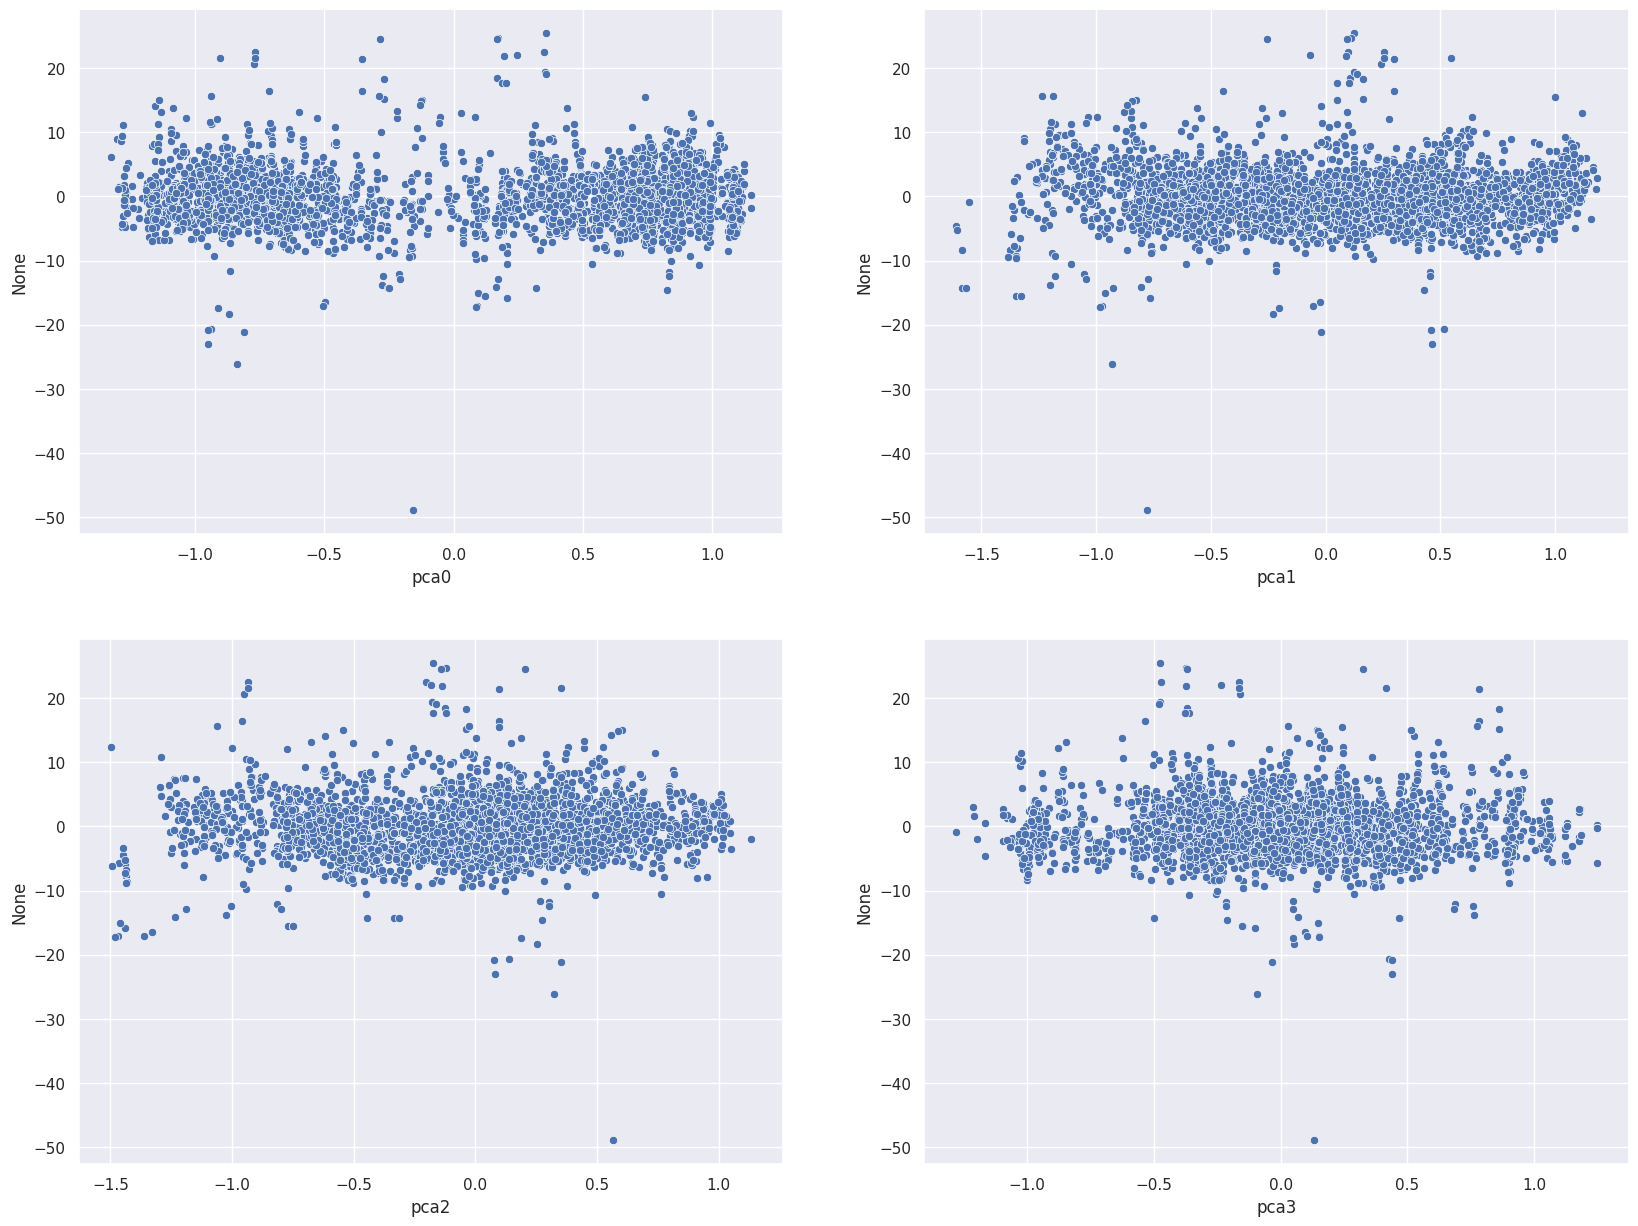

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# 'ax' assigs axes object to draw the plot onto
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
     sns.scatterplot(x=variable, y=MLR_full_model.resid , data=X_train, ax=subplot)

plt.show()

 The above plots show no specific pattern, implies that there is a linearity present in the data

### 6.9.2 Assumption #2: Checking for Autocorrelation<a id="che_aut_cor"></a>

From the above summary [Section 6.8](#mod_fea_sel), we can observe that the value obtained from the `Durbin-Watson` test statistic is close to **2** (= 2.012). Thus, we conclude that there is no autocorrelation.

### 6.9.3 Assumption #3: Checking for Heteroskedasticity<a id="che_het"></a>

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [ ]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)
lzip(name, test[2:])

[('f-value', 24.920718657755742), ('p-value', 1.1586361964922653e-136)]

We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 6.9.4 Assumption #4: Tests for Normality<a id="tes_nor"></a>

#### 6.9.4.1 Q-Q Plot<a id="qq_plt"></a>

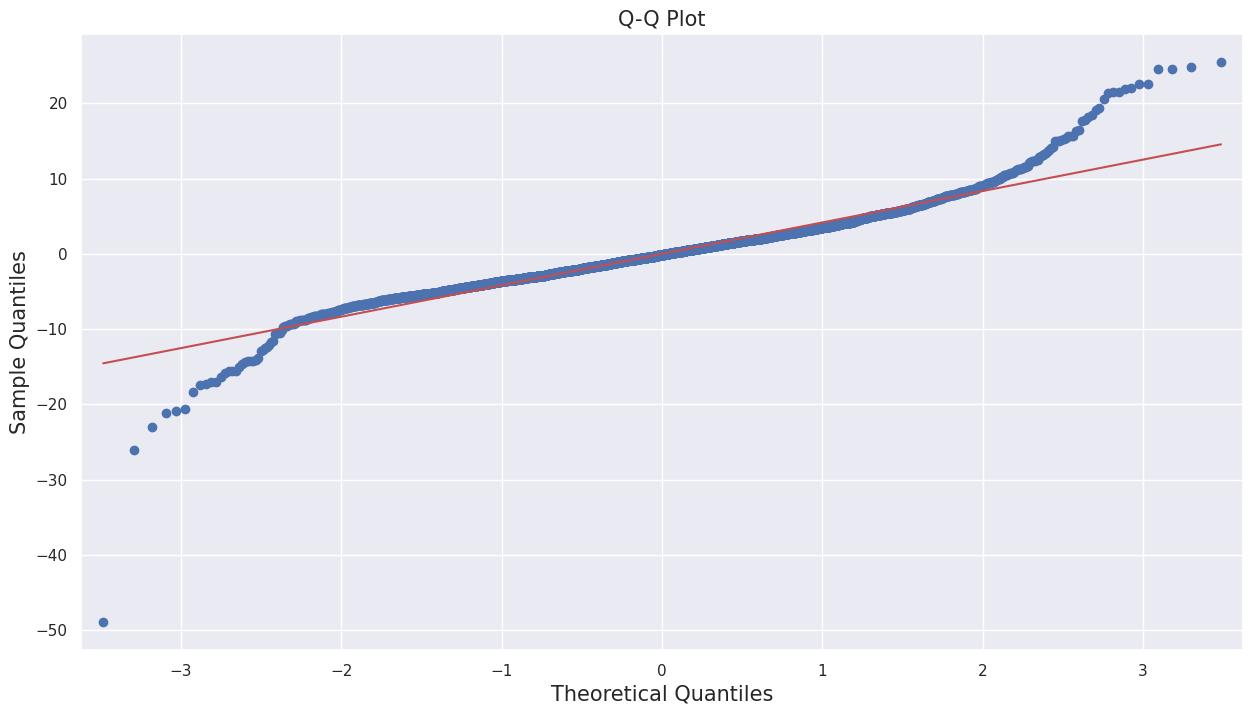

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_full_model.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

 The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are not close to the diagonal line, we conclude that the residuals do not follow a `normal distribution.`

#### 6.9.4.2 Shapiro Wilk Test<a id="sha_wil_tes"></a>

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [ ]:
stat, p_value = shapiro(MLR_full_model.resid)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9365528784940625
P-Value: 1.3646466248343645e-38


From the above test we can see that the p-value is 1.365e-38 (less than 0.05), thus we can say that the residuals are not normally distributed.



# 7. Model Evaluation<a id="mod_eva"></a>

## 7.1 Measures of Variation<a id="mea_var"></a>

In [ ]:
y_train_pred = MLR_full_model.predict(X_train)
y_train_pred.head()

,0
5436,275.693034
5691,229.794390
187,209.965940
1393,173.479739
1980,226.468762


In [ ]:
ssr = np.sum((y_train_pred - y_train.mean())**2)
sse = np.sum((y_train - y_train_pred)**2)
sst = np.sum((y_train - y_train.mean())**2)


print('Sum of Squared Regression:',ssr)
print('Sum of Squared Error:',sse)
print('Sum of Sqaured Total:',sst)
print('Sum of SSR and SSE is:',ssr+sse)

Sum of Squared Regression: 10203607.583808027
Sum of Squared Error: 75620.85539608716
Sum of Sqaured Total: 10279228.439204127
Sum of SSR and SSE is: 10279228.439204114


In [ ]:
r_sq =MLR_full_model.rsquared

# print the R-squared value
print('R Squared is:',r_sq)

R Squared is: 0.9926433335105507


In [ ]:
see = np.sqrt(sse/(len(X_train) - 2))
print("The standard error of estimate:",see)

The standard error of estimate: 4.310989329468657


## 7.2 Inferences about Intercept and Slope<a id="inf_int_slo"></a>

In [ ]:
t_intercept =MLR_full_model.params[0] / MLR_full_model.bse[0]
print('t intercept:',t_intercept)

t intercept: 3625.4024875105006


In [ ]:
t_coeff1 =MLR_full_model.params[1] / MLR_full_model.bse[1]
print('t coeff:',t_coeff1)

t coeff: -178.3870782142783


degrees of freedom = n - 1 = 4070 - 1 = 4069

In [ ]:
pval = stats.t.sf(np.abs(t_intercept), 4069)*2
print('p val for intercept:',pval)

p val for intercept: 0.0


## 7.3 Confidence Interval for Intercept and Slope<a id="con_int_slo"></a>

t_table_value = 1.9622

In [ ]:
CI_inter_min, CI_inter_max = MLR_full_model.params[0] - (1.9622*MLR_full_model.bse[0]), MLR_full_model.params[0] + (1.9622*MLR_full_model.bse[0])
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [245.9284117309545, 246.19476673681004]


In [ ]:
CI_coeff1_min, CI_coeff1_max = MLR_full_model.params[1] - (1.9622*MLR_full_model.bse[1]), MLR_full_model.params[1] + (1.9622*MLR_full_model.bse[1])
print('CI for coeff1:', [CI_coeff1_min, CI_coeff1_max])

CI for coeff1: [-15.617843561249863, -15.277999310811847]


## 7.4 Compare Regression Results<a id="com_reg_res"></a>

In [ ]:
r_sq_mlr = MLR_full_model.rsquared
print('r square in regression model:',r_sq_mlr)

r square in regression model: 0.9926433335105507


The value of R-squared is 0.993. Thus, we conclude that the 99.3% variation in the CO2_Emissions is explained by the model.

In [ ]:
adj_r_sq = MLR_full_model.rsquared_adj
print('Adjusted r square for regression model:',adj_r_sq)

Adjusted r square for regression model: 0.9925831972722173


Overall F-Test & p-value of the Model

compute f_value using the below formula


f_value = (r_sq / k-1)/((1- r_sq)/n-k)

k = number of beta coefficients
n = number of observations

In [ ]:
k = len(X_train.columns)
n = len(X_train)

f_value = (r_sq_mlr / (k - 1))/((1-r_sq_mlr)/(n - k))
print('f value for regression model:',f_value)

f value for regression model: 16506.57508718288


degrees of freedom
dfn = k-1 = 32-1 = 31
dfd = n-k = 4396-32 = 4364

In [ ]:
p_val = stats.f.sf(f_value, dfn = 31, dfd = 4364)
print('p value for regression model:',p_val)

p value for regression model: 0.0


As, the p-value is 0 which is less than 0.05, we accept the alternate hypothesis; i.e. the model is significant.

# 8. Model Performance<a id="mod_per"></a>

In [ ]:
train_pred = MLR_full_model.predict(X_train)
test_pred = MLR_full_model.predict(X_test)

## 8.1 Mean Squared Error (MSE)<a id="mse"></a>

In [ ]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  18.5755
Mean Squared Error (MSE) on test set:  24.4915


## 8.2 Root Mean Squared Error (RMSE)<a id="rmse"></a>

In [ ]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)

mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  4.3099
Root Mean Squared Error (RMSE) on test set:  4.9489


## 8.3 Mean Absolute Error (MAE)<a id="mae"></a>

In [ ]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)
mae_test = round(mean_absolute_error(y_test, test_pred),4)


print("Mean Absolute Error (MAE) on training set: ", mae_train)
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  3.1134
Mean Absolute Error (MAE) on test set:  3.1096


## 8.4 Mean Absolute Percentage Error (MAPE)<a id="mape"></a>

In [ ]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [ ]:
mape_train = round(mape(y_train, train_pred),4)
mape_test = round(mape(y_test, test_pred),4)

print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.3148
Mean Absolute Percentage Error (MAPE) on test set:  1.3016


## 8.5 Result Table<a id="res_tab"></a>

In [ ]:
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

result_table = pd.DataFrame(columns = cols)

MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': MLR_full_model.rsquared,
                     'Adj. R-squared': MLR_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test, test_pred),
                     'RMSE': rmse(y_test, test_pred),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mape(y_test, test_pred)
                   })

result_table = pd.concat([result_table, MLR_full_model_metrics.to_frame().T], ignore_index=True)

result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,0.992643,0.992583,24.491506,4.948889,3.109577,1.301550


# 9. Model Optimization<a id="mod_opt"></a>

## 9.1 BIAS <a id="bias"></a>

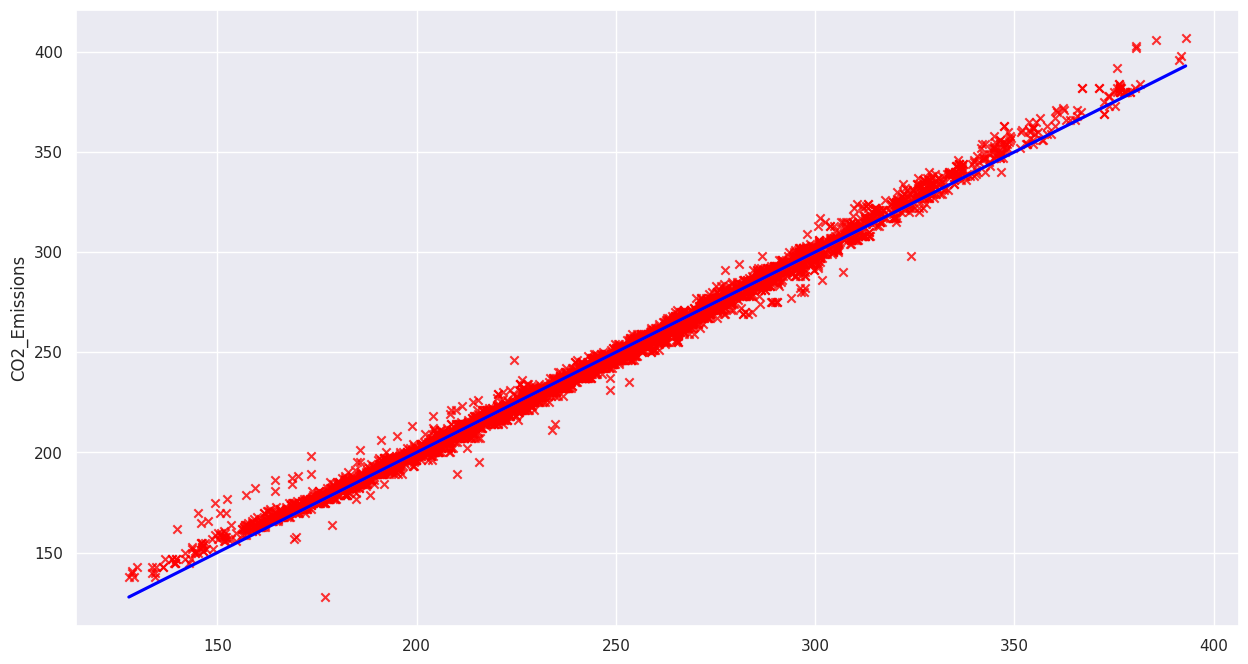

In [ ]:
sns.regplot(y = y_train,x = train_pred,color='red',line_kws={'color':'blue'},marker='x')
plt.show()

## 9.2 VARIANCE<a id="var"></a>

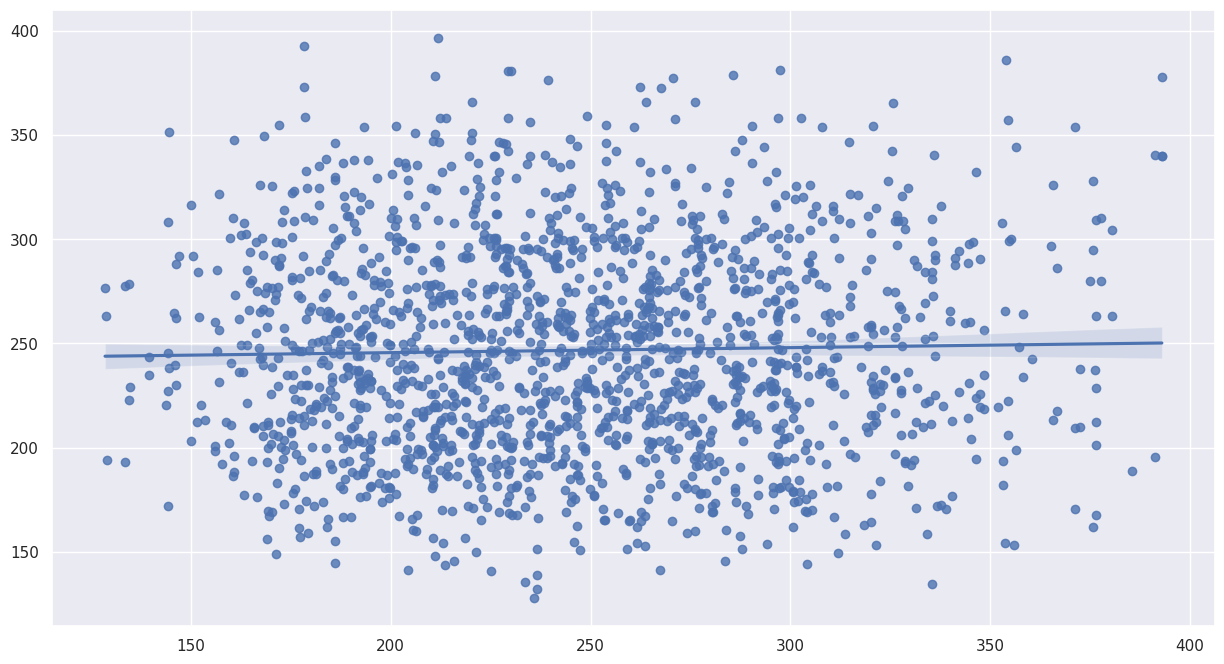

In [ ]:
a = np.random.randint(1,4070,1745)
train_pred1 = list(train_pred)
TrainPred2 = []

for i in a:
    TrainPred2.append(train_pred1[i])

sns.regplot(y = test_pred,x = TrainPred2)
plt.show()

The bias is low and variance is high, hence we can assume that the model is a complex one. We will have to employ optimization techniques to reduce the complexity and RMSE.

# 9.3. MODEL VALIDATION<a id="mod_val"></a>

## 9.3.1 Cross Validation<a id="cro_val"></a>

In [ ]:
kf = KFold(n_splits = 10)

def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [ ]:
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]

    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k))


print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9927063310903411, 0.9921906482701542, 0.9937395331860878, 0.9926333889486604, 0.9925046046836536, 0.9923790213532752, 0.9925225016903895, 0.9899440327829567, 0.9937938419927258, 0.9923823571004826]

Minimum score obtained:  0.9899
Maximum score obtained:  0.9938
Average score obtained:  0.9925


In [ ]:
scores = cross_val_score(estimator = LinearRegression(),
                         X = X_train,
                         y = y_train,
                         cv = 10,
                         scoring = 'r2')

print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.99270633 0.99219065 0.99373953 0.99263339 0.9925046  0.99237902
 0.9925225  0.98994403 0.99379384 0.99238236]

Minimum score obtained:  0.9899
Maximum score obtained:  0.9938
Average score obtained:  0.9925


**The R2 value is similar to the one obtained in the MLR model. There are no significant changes.**

## 9.3.2 Leave Out One Cross Validation(LOOCV)<a id="loocv"></a>

In [ ]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)

In [ ]:
loocv_rmse = []
loocv = LeaveOneOut()

for train_index, test_index in loocv.split(X_train):

    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]

    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)

    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    loocv_rmse.append(rmse)

In [ ]:
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0004
Maximum rmse obtained:  49.7319
Average rmse obtained:  3.1425


# 9.4 GRADIENT DESCENT<a id="gra_des"></a>

Helper functions

In [ ]:
def get_train_rmse(model):

    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model):

    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def get_test_mape(model):

    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def plot_coefficients(model, algorithm_name):

    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

def get_score(model):

    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [ ]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 4.3716
RMSE on test set: 4.9856


In [ ]:
MLR_model = linreg.fit(X_train, y_train)

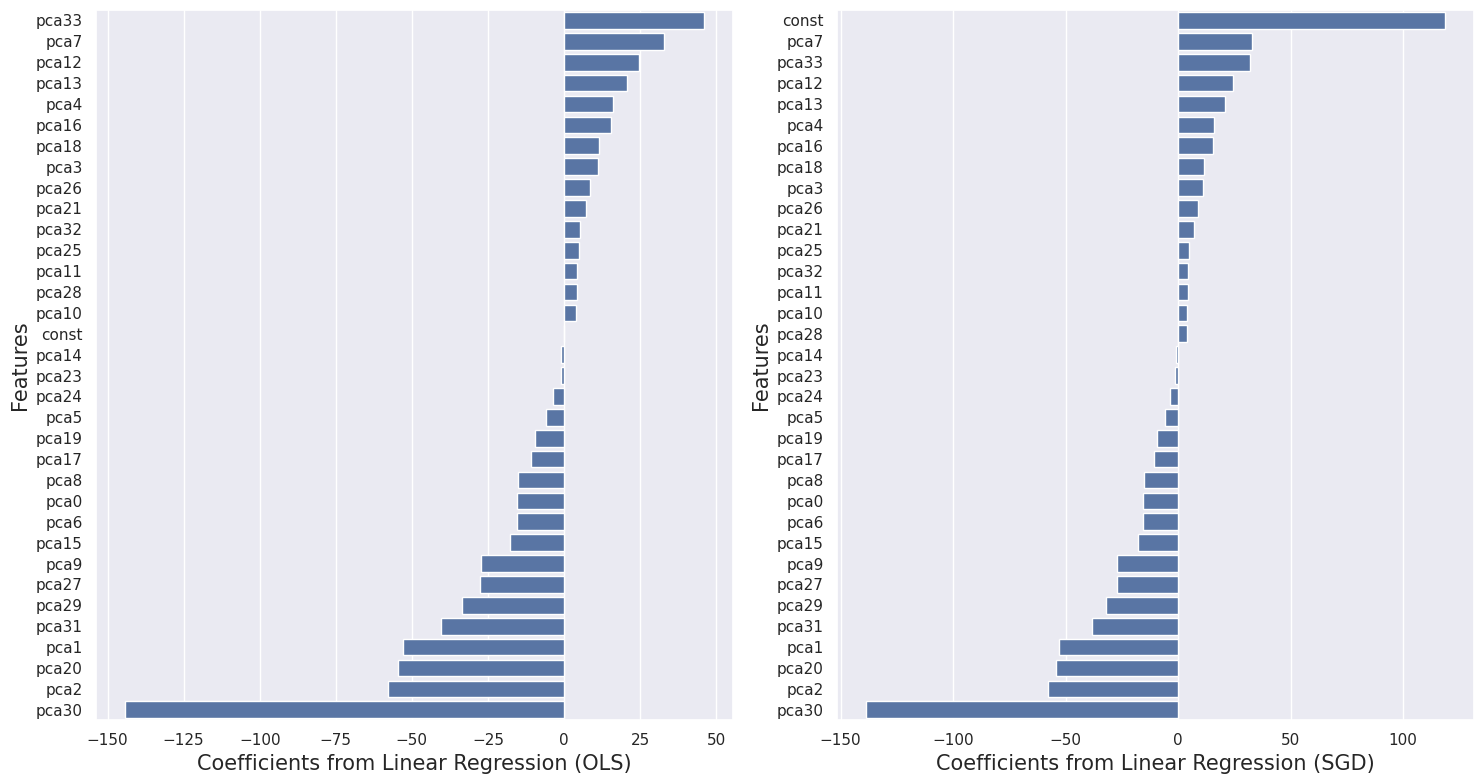

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

plt.tight_layout()

In [ ]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):

    global score_card
    # Convert the new row to a DataFrame
    new_row = pd.DataFrame([{'Model_Name': algorithm_name,
                               'Alpha (Wherever Required)': alpha,
                               'l1-ratio': l1_ratio,
                               'Test_MAPE': get_test_mape(model),
                               'Train_RMSE': get_train_rmse(model),
                               'Test_RMSE': get_test_rmse(model),
                               'R-Squared': get_score(model)[0],
                               'Adj. R-Squared': get_score(model)[1]}])
    # Append the new row using concat
    score_card = pd.concat([score_card, new_row], ignore_index = True)

In [ ]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992431,0.992367,4.371600,4.985600,1.316064


# 9.5  Regularization<a id="reg"></a>

## 9.5.1 Ridge Regression Model<a id="ridge"></a>

In [ ]:
ridge = Ridge(alpha = 0.1, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 0.1)', model = ridge, alpha = 0.1)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 4.9461


In [ ]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

print('RMSE on test set:', np.round(get_test_rmse(ridge),2))

RMSE on test set: 4.95


In [ ]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 5.0109


In [ ]:
ridge = Ridge(alpha = 0.5, max_iter = 500)
ridge.fit(X_train, y_train)

update_score_card(algorithm_name='Ridge Regression (with alpha = 0.5)', model = ridge, alpha = 0.5)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 4.9424


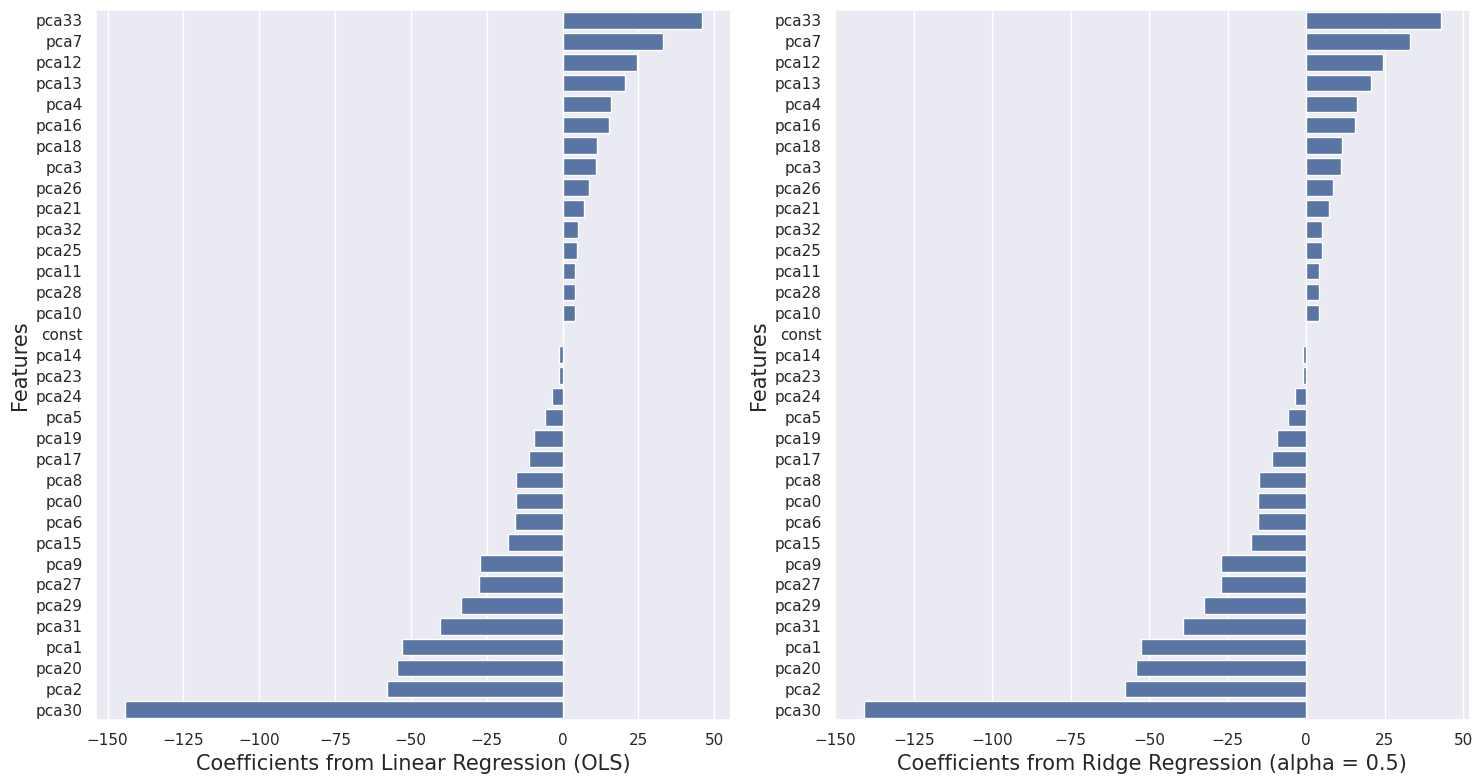

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 0.5)')

plt.tight_layout()

The coefficients obtained from ridge regression have similar values as compared to the coefficients obtained from linear regression using OLS.

## 9.5.2 Lasso Regression Model<a id="lasso"></a>

In [ ]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 4.9804


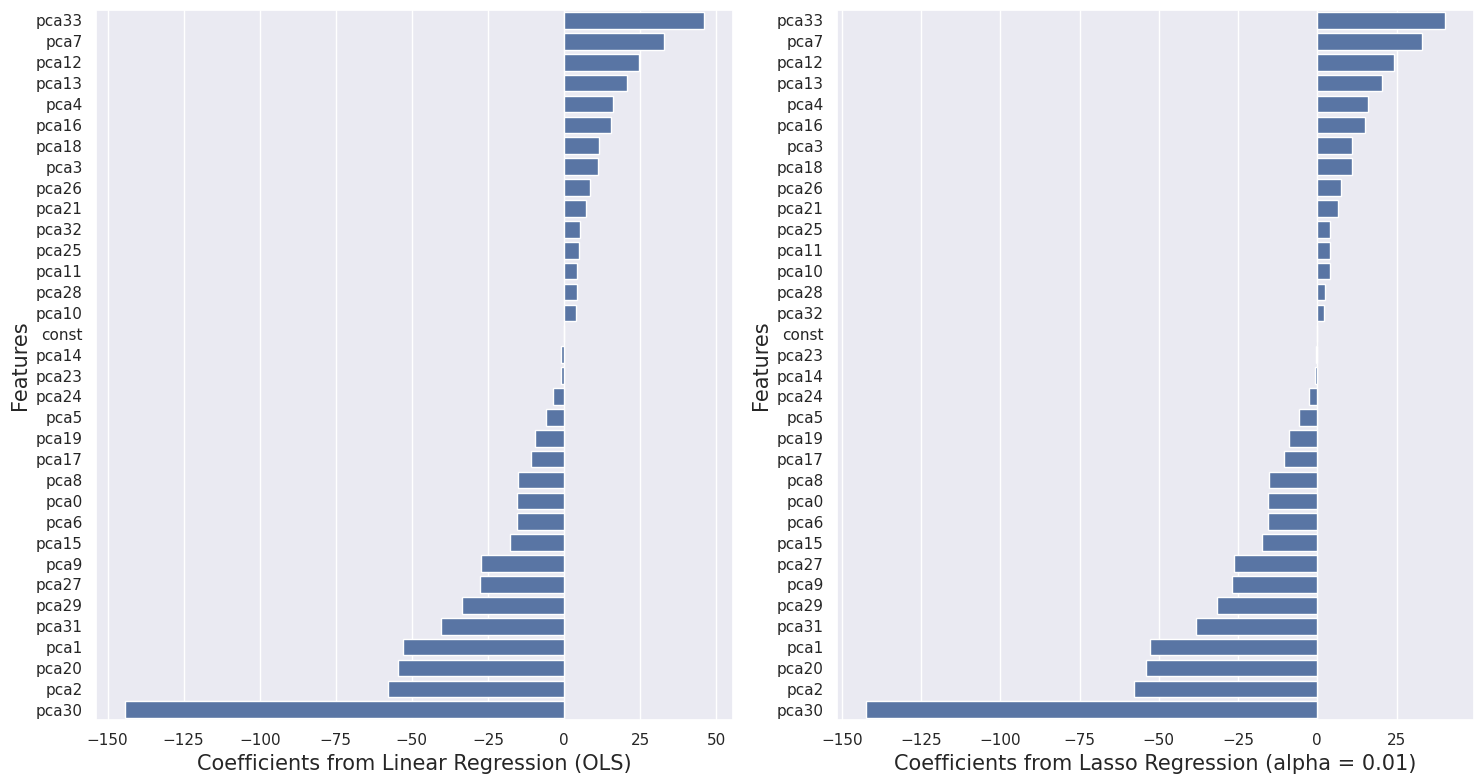

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

plt.tight_layout()

In [ ]:
lasso = Lasso(alpha = 0.05, max_iter = 500)
lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 5.5144


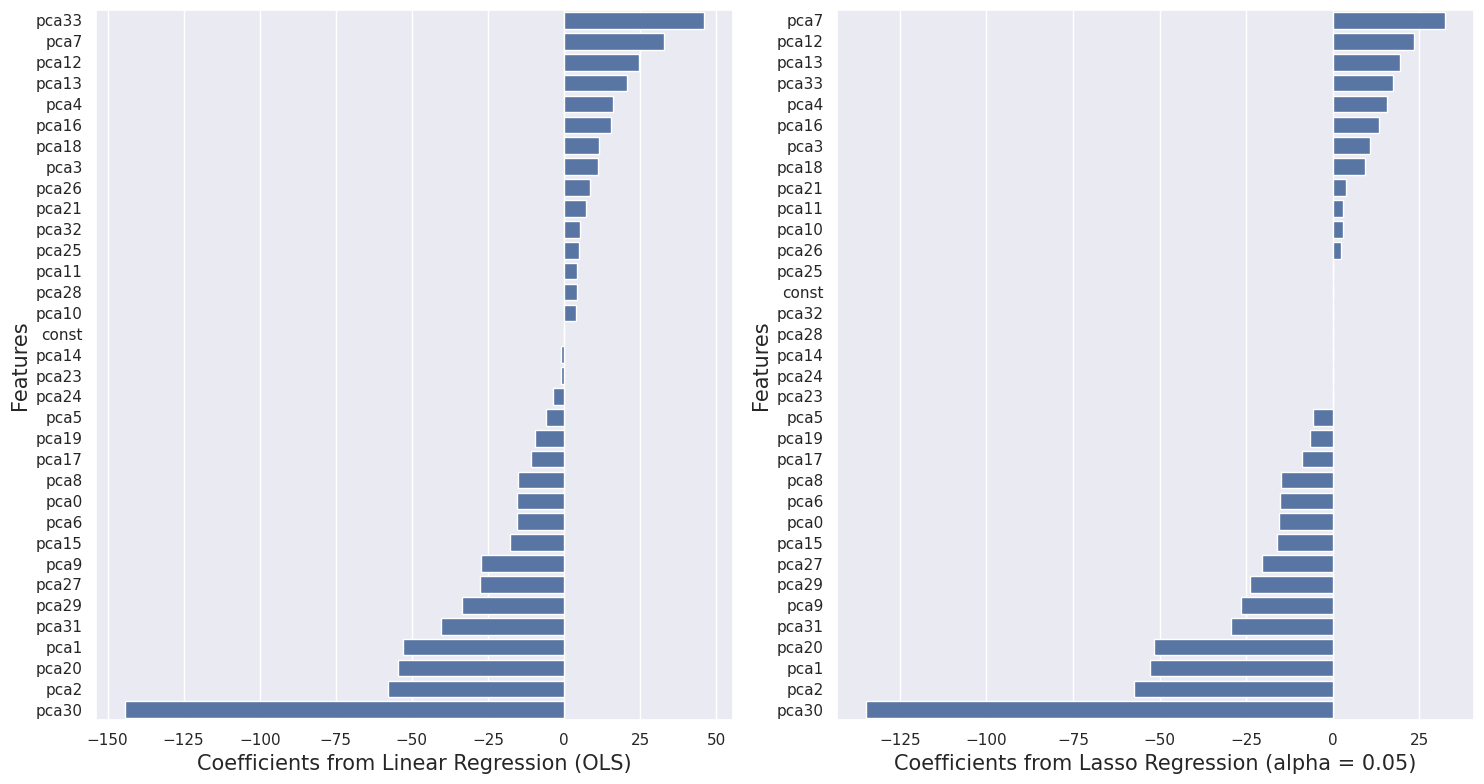

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.05)')

plt.tight_layout()

The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

In [ ]:
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.05')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.05


['const', 'pca14', 'pca23', 'pca24', 'pca28', 'pca32']

In [ ]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.05')

## 9.5.3 Elastic-Net Regression Model<a id="ela_net"></a>

In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.55, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.55')

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 15.5696


In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.1, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.1')

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 19.1626


In [ ]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train, y_train)

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 19.7743


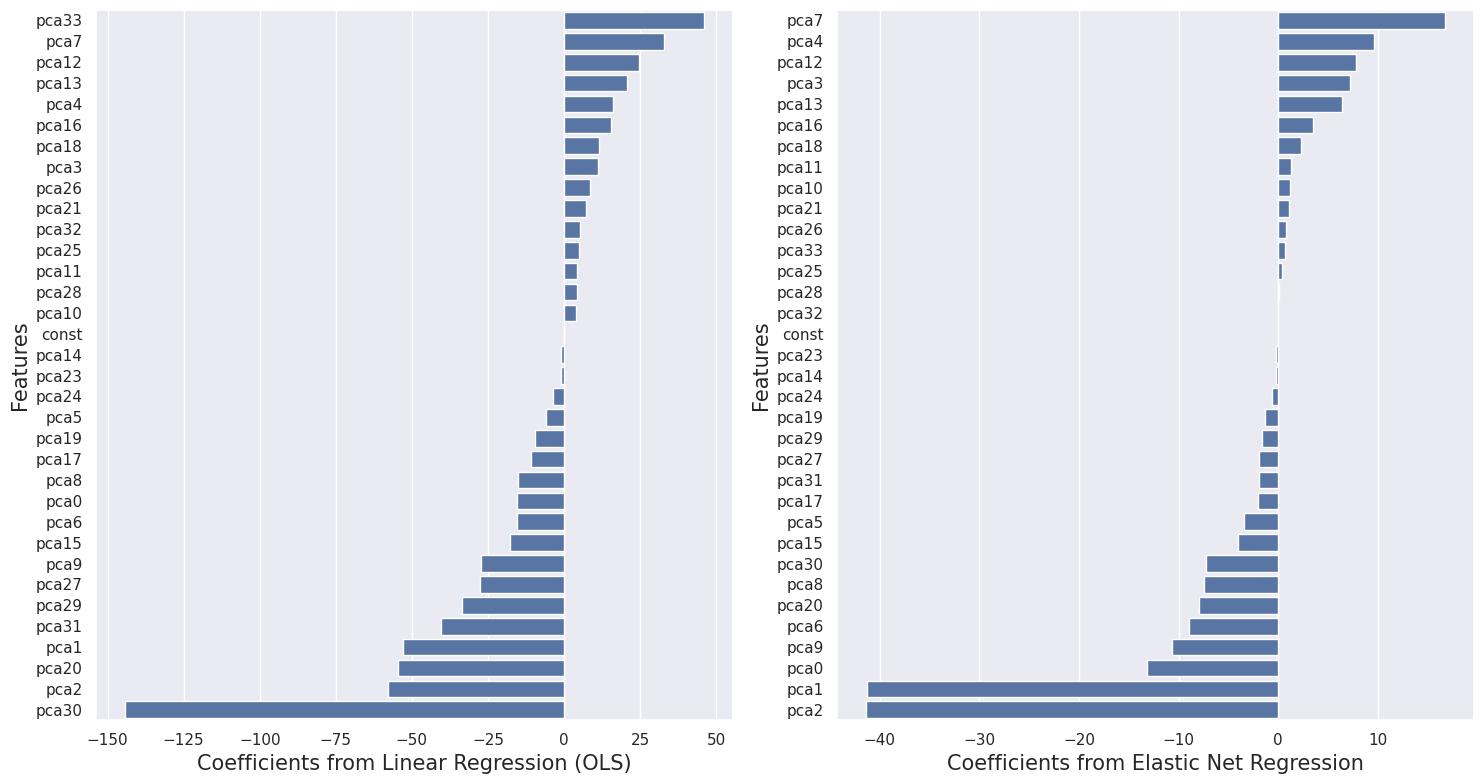

In [ ]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

plt.tight_layout()

The second subplot (on the right) shows that the elastic-net regression has reduced the coefficients of some variables to zero.

## 9.5.4 Grid Search CV<a id="gri_sea"></a>

In [ ]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge,
                          param_grid = tuned_paramaters,
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.01} 

RMSE on test set: 4.9486


In [ ]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)',
                  model = ridge_grid,
                  alpha = ridge_grid.best_params_.get('alpha'))

In [ ]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]

lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso,
                          param_grid = tuned_paramaters,
                          cv = 10)

lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.001} 

RMSE on test set: 4.9495


In [ ]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)',
                  model = lasso_grid,
                  alpha = lasso_grid.best_params_.get('alpha'))

In [ ]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.4, 0.55]}]

enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet,
                          param_grid = tuned_paramaters,
                          cv = 10)

enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.55} 

RMSE on test set: 4.9445


In [ ]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)',
                  model = enet_grid,
                  alpha = enet_grid.best_params_.get('alpha'),
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# 10. Displaying score summary<a id="dis_sco_sum"></a>

In [ ]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 0.5),0.500000,-,0.992608,0.992546,4.320100,4.942400,1.295323
1,Elastic Net Regression (using GridSearchCV),0.000100,0.550000,0.992638,0.992576,4.311400,4.944500,1.298470
2,Ridge Regression (with alpha = 0.1),0.100000,-,0.992642,0.992580,4.310400,4.946100,1.299821
3,Ridge Regression (using GridSearchCV),0.010000,-,0.992643,0.992581,4.309900,4.948600,1.301376
4,Lasso Regression (using GridSearchCV),0.001000,-,0.992642,0.992580,4.310200,4.949500,1.300853
5,Ridge Regression (with alpha = 1),1,-,0.992512,0.992449,4.348300,4.952200,1.294861
6,Linear Regression (using SGD),-,-,0.992431,0.992367,4.371600,4.985600,1.316064
7,Ridge Regression (with alpha = 2),2,-,0.992171,0.992106,4.446000,5.010900,1.310282
8,Lasso Regression,0.05,-,0.990470,0.990390,4.905500,5.514400,1.458071
9,Elastic Net Regression,0.1,0.55,0.903067,0.902251,15.644600,15.569600,4.825320


# 11. Conclusion<a id="conclu"></a>

* Lasso Regression using Grid search CV has been the most effective in reducing RMSE .
* The exact combination of features responsible for high CO2 emissions cannot be predicted  Since all the features are highly correlated
* We can hereby conclude that we have successfully built a model that can predict amount of CO2 Emissions across different vehicle types at a high accuracy rate.

# Novelty Idea

## LSTM/BiLSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# 1. Load and Preprocess the Data
# -------------------------------
df = pd.read_csv("CO2 Emissions_Canada.csv").drop_duplicates().dropna()

# -------------------------------
# 2. Feature Selection & Encoding
# -------------------------------
categorical = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
numerical = ['Engine Size(L)', 'Cylinders',
             'Fuel Consumption City (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)',
             'Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Comb (mpg)']
target = 'CO2 Emissions(g/km)'

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[categorical], drop_first=True)
X_raw = pd.concat([df[numerical], df_encoded], axis=1)
y_raw = df[target]

# -------------------------------
# 3. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)

# -------------------------------
# 4. Feature Scaling
# -------------------------------
# Scale input features using StandardScaler
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale target variable to [0, 1] using MinMaxScaler
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# -------------------------------
# 5. Reshape Data for LSTM
# -------------------------------
# LSTM models expect data in 3D shape: (samples, timesteps, features)
X_train_seq = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_seq = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# -------------------------------
# 6. Define Model Building Functions
# -------------------------------

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        LSTM(64, return_sequences=True),
        BatchNormalization(),
        Dropout(0.2),

        LSTM(32),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        Dropout(0.1),

        Dense(1)  # Output: scaled CO2 value
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        Bidirectional(LSTM(64, return_sequences=True)),
        BatchNormalization(),
        Dropout(0.2),

        Bidirectional(LSTM(32)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        Dropout(0.1),

        Dense(1)  # Output: scaled CO2 value
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# -------------------------------
# 7. Train the Models
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train LSTM Model
print("Training LSTM model...")
model_lstm = build_lstm_model((1, X_train_scaled.shape[1]))
history_lstm = model_lstm.fit(
    X_train_seq, y_train_scaled.flatten(),
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Train BiLSTM Model
print("\nTraining BiLSTM model...")
model_bilstm = build_bilstm_model((1, X_train_scaled.shape[1]))
history_bilstm = model_bilstm.fit(
    X_train_seq, y_train_scaled.flatten(),
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------
# 8. Make Predictions and Inverse Scaling
# -------------------------------
# LSTM Predictions
y_train_pred_lstm_scaled = model_lstm.predict(X_train_seq)
y_test_pred_lstm_scaled = model_lstm.predict(X_test_seq)

y_train_pred_lstm = y_scaler.inverse_transform(y_train_pred_lstm_scaled)
y_test_pred_lstm = y_scaler.inverse_transform(y_test_pred_lstm_scaled)

# BiLSTM Predictions
y_train_pred_bilstm_scaled = model_bilstm.predict(X_train_seq)
y_test_pred_bilstm_scaled = model_bilstm.predict(X_test_seq)

y_train_pred_bilstm = y_scaler.inverse_transform(y_train_pred_bilstm_scaled)
y_test_pred_bilstm = y_scaler.inverse_transform(y_test_pred_bilstm_scaled)

# True target values (original scale)
y_train_true = y_train.values
y_test_true = y_test.values

# -------------------------------
# 9. Compute Evaluation Metrics
# -------------------------------
# Function to compute Pearson correlation coefficient
def pearson_r(y_true, y_pred):
    return np.corrcoef(y_true.flatten(), y_pred.flatten())[0, 1]

# --- Metrics for LSTM Model ---
train_mse_lstm = mean_squared_error(y_train_true, y_train_pred_lstm)
train_rmse_lstm = np.sqrt(train_mse_lstm)
train_r_lstm = pearson_r(y_train_true, y_train_pred_lstm)
train_r2_lstm = r2_score(y_train_true, y_train_pred_lstm)

test_mse_lstm = mean_squared_error(y_test_true, y_test_pred_lstm)
test_rmse_lstm = np.sqrt(test_mse_lstm)
test_r_lstm = pearson_r(y_test_true, y_test_pred_lstm)
test_r2_lstm = r2_score(y_test_true, y_test_pred_lstm)

# --- Metrics for BiLSTM Model ---
train_mse_bilstm = mean_squared_error(y_train_true, y_train_pred_bilstm)
train_rmse_bilstm = np.sqrt(train_mse_bilstm)
train_r_bilstm = pearson_r(y_train_true, y_train_pred_bilstm)
train_r2_bilstm = r2_score(y_train_true, y_train_pred_bilstm)

test_mse_bilstm = mean_squared_error(y_test_true, y_test_pred_bilstm)
test_rmse_bilstm = np.sqrt(test_mse_bilstm)
test_r_bilstm = pearson_r(y_test_true, y_test_pred_bilstm)
test_r2_bilstm = r2_score(y_test_true, y_test_pred_bilstm)

# -------------------------------
# 10. Create and Display Results Table
# -------------------------------
results_df = pd.DataFrame({
    "Model": ["LSTM model", "LSTM model", "BiLSTM model", "BiLSTM model"],
    "Dataset": ["Train", "Test", "Train", "Test"],
    "#MSE": [
        float(train_mse_lstm), float(test_mse_lstm),
        float(train_mse_bilstm), float(test_mse_bilstm)
    ],
    "#RMSE": [
        float(train_rmse_lstm), float(test_rmse_lstm),
        float(train_rmse_bilstm), float(test_rmse_bilstm)
    ],
    "#R (%)": [
        train_r_lstm * 100, test_r_lstm * 100,
        train_r_bilstm * 100, test_r_bilstm * 100
    ],
    "R2 (%)": [
        train_r2_lstm * 100, test_r2_lstm * 100,
        train_r2_bilstm * 100, test_r2_bilstm * 100
    ]
})

print("\n Final Model Performance Results:")
print(results_df)


Training LSTM model...
Epoch 1/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.3745 - mae: 0.4716 - val_loss: 0.0862 - val_mae: 0.2608
Epoch 2/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0974 - mae: 0.2467 - val_loss: 0.0508 - val_mae: 0.1881
Epoch 3/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0623 - mae: 0.1939 - val_loss: 0.0264 - val_mae: 0.1259
Epoch 4/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0433 - mae: 0.1635 - val_loss: 0.0175 - val_mae: 0.0999
Epoch 5/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0360 - mae: 0.1483 - val_loss: 0.0155 - val_mae: 0.0919
Epoch 6/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0276 - mae: 0.1304 - val_loss: 0.0129 - val_mae: 0.0826
Epoch 7/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0223 - mae: 0.1171 - val_loss: 0.0115 - val_mae: 0.0777
Epoch 8/200
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0186 - mae: 0.1064 - val_loss: 0.0103 - val_mae: 0.0725
Epoch 9/200
126/

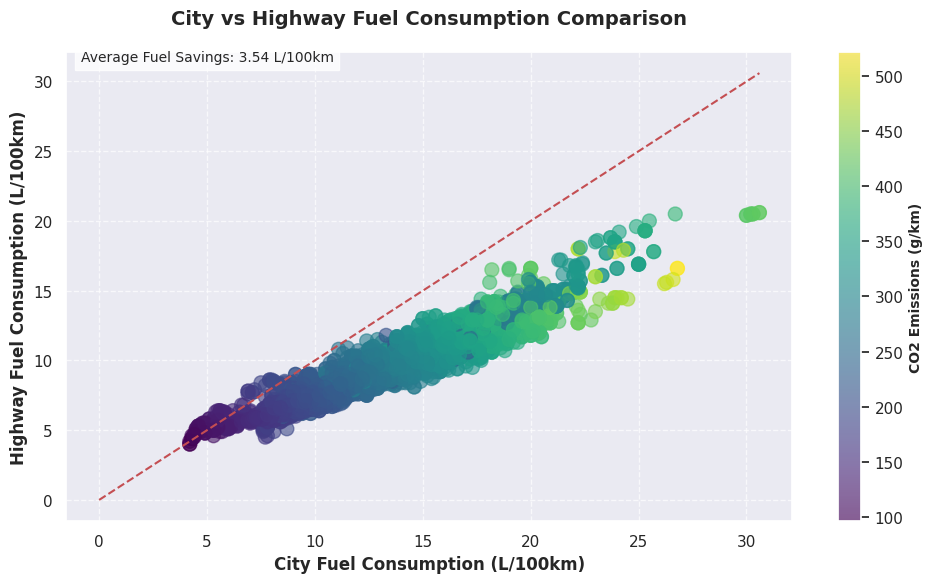

In [ ]:

df.columns = df.columns.str.replace(" (L/100 km)", "")
df.columns = df.columns.str.replace("(L)", "")
df.columns = df.columns.str.replace("(g/km)", "")
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['fuel_consumption_city'],
                     df['fuel_consumption_hwy'],
                     alpha=0.6,
                     c=df['co2_emissions'],
                     cmap='viridis',
                     s=100)

plt.plot([0, max(df['fuel_consumption_city'])],
         [0, max(df['fuel_consumption_city'])],
         'r--',
         label='Equal Consumption Line')

plt.xlabel('City Fuel Consumption (L/100km)', fontsize=12, fontweight='bold')
plt.ylabel('Highway Fuel Consumption (L/100km)', fontsize=12, fontweight='bold')
plt.title('City vs Highway Fuel Consumption Comparison',
          fontsize=14,
          fontweight='bold',
          pad=20)

plt.grid(True, linestyle='--', alpha=0.7)

colorbar = plt.colorbar(scatter)
colorbar.set_label('CO2 Emissions (g/km)', fontsize=10, fontweight='bold')

avg_diff = (df['fuel_consumption_city'] - df['fuel_consumption_hwy']).mean()
plt.text(0.02, 0.98,
         f'Average Fuel Savings: {avg_diff:.2f} L/100km',
         transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Deep Neural Network Regression Model Pipeline

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

columns_to_encode = ['make','model','vehicle_class','transmission','fuel_type']
label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # We keep encoders for recycling

y= df['co2_emissions'].values
x= df.drop(columns=['co2_emissions']).values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=42)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()


early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_test,y_test),
    callbacks=[early_stopping],
    verbose=1
)


test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_loss:.2f}")

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.4f}")

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,345 (67.75 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 61502.7695 - mae: 240.8771 - val_loss: 28033.0996 - val_mae: 163.4027
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6743.1265 - mae: 64.4283 - val_loss: 12205.2031 - val_mae: 105.9174
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2216.6235 - mae: 35.9761 - val_loss: 3497.5366 - val_mae: 54.6291
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1530.0308 - mae: 30.7205 - val_loss: 616.3348 - val_mae: 21.2225
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1195.3098 - mae: 27.1981 - val_loss: 188.4576 - val_mae: 9.9509
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 997.4299 - mae: 24.9536 - val_loss: 248.8027 - val_mae: 12.4052
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1131.2808 - mae: 25.8258 - val_loss: 209.5832 - val_mae: 10.9296
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 954.8032 - mae: 24.5384 - val_loss: 163.8801 - va

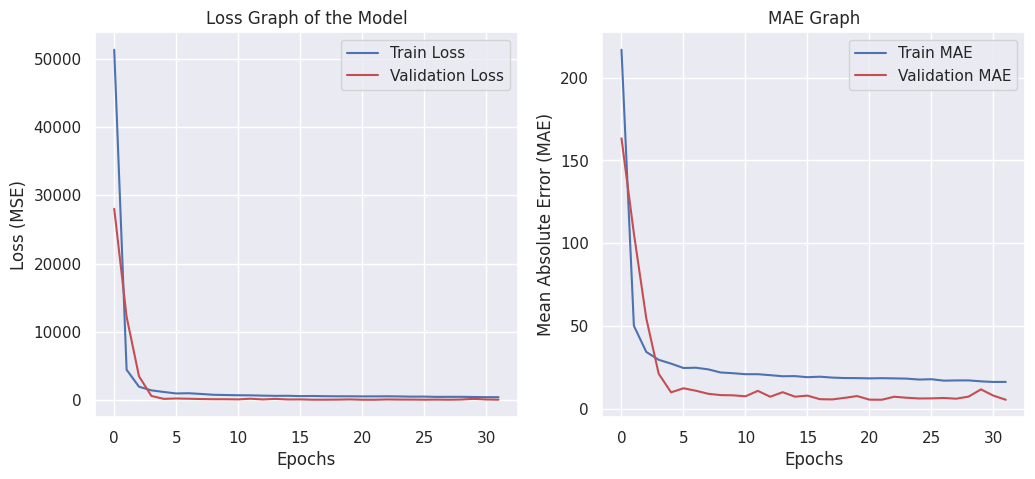

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Graph of the Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], color='b', label='Train MAE')
plt.plot(history.history['val_mae'], color='r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Graph')
plt.legend()

plt.show()

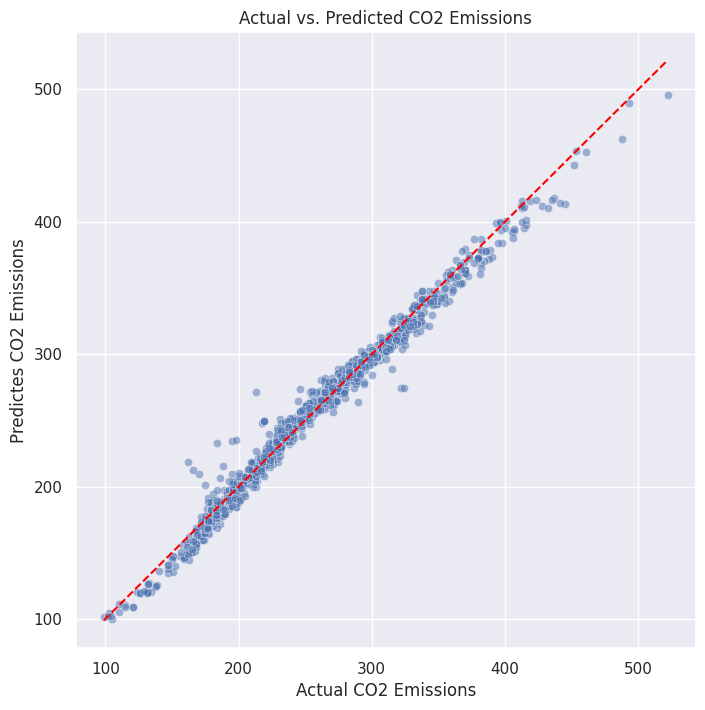

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CO2 Emissions", fontsize=12)
plt.ylabel("Predictes CO2 Emissions", fontsize=12)
plt.title("Actual vs. Predicted CO2 Emissions", fontsize=12)
plt.show()

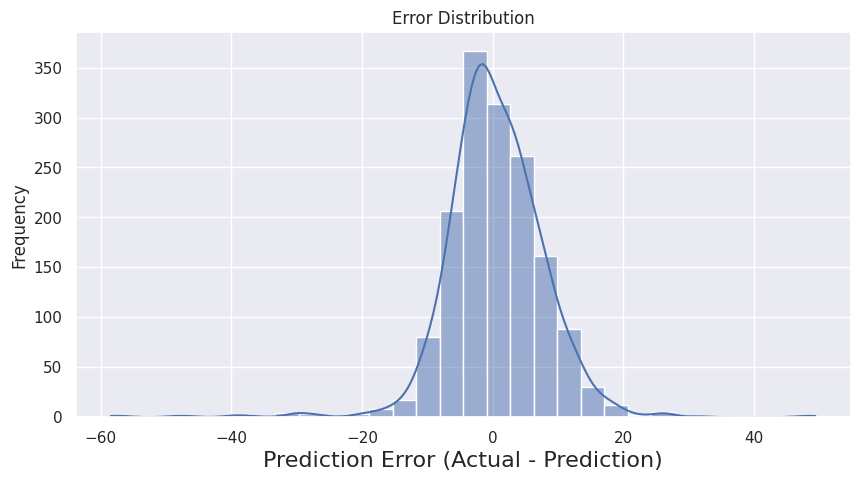

In [ ]:
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Actual - Prediction)", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution", fontsize=12)
plt.show()